In [ ]:
 #Visualization / EDA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Saving trained models for future deployment.
import pickle

# For dimensionality reduction and feature extraction.
from sklearn.decomposition import PCA

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning : Training
from xgboost import plot_importance
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score # Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report # Classification

In [1]:

     
#Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

import os

# For managing warning messages.
import warnings

# Data cleaning
import pandas as pd
import numpy as np
import ast           # To convert string to dictionary
import datetime

# Establishing database and file system connections.
#from google.colab import drive

# Statistical analysis and hypothesis testing.
from scipy import stats




In [2]:
#

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install plotly.express as px

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install plotly.graph_objects 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install pytest-warnings


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install  pandas 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
sales_path=r"C:\Users\Prajee\Downloads\sales_data_set (2).csv"
store_path=r"C:\Users\Prajee\Downloads\stores_data_set (1).csv"
features_path=r"C:\Users\Prajee\Downloads\Features_data_set (2).csv"
sales_df=pd.read_csv(sales_path)
store_df=pd.read_csv(store_path)
features_df=pd.read_csv(features_path)

In [15]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [17]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [19]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [20]:
sales_df.shape

(421570, 5)

In [21]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [22]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [23]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [24]:
features_df.shape

(8190, 12)

In [25]:
store_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [26]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [27]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [28]:
sales_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [29]:
sales_df.shape

(421570, 5)

DATA CLEANING

In [30]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [31]:
features_df['MarkDown1'].fillna(0, inplace=True)
features_df['MarkDown2'].fillna(0, inplace=True)
features_df['MarkDown3'].fillna(0, inplace=True)
features_df['MarkDown4'].fillna(0, inplace=True)
features_df['MarkDown5'].fillna(0, inplace=True)

print(features_df)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572       0.00       0.00   
1         1  12/02/2010        38.51       2.548       0.00       0.00   
2         1  19/02/2010        39.93       2.514       0.00       0.00   
3         1  26/02/2010        46.63       2.561       0.00       0.00   
4         1  05/03/2010        46.50       2.625       0.00       0.00   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0          0.00       0.00       0

C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\394966731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['MarkDown1'].fillna(0, inplace=True)
C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\394966731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [32]:
features_df['CPI'].fillna(method='ffill', inplace=True)
features_df['Unemployment'].fillna(method = 'ffill', inplace = True)

C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\8104005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['CPI'].fillna(method='ffill', inplace=True)
C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\8104005.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_df['CPI'].fillna(method='ffill', inplace=True)
C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\8104005.py:2: FutureWarning: A value is trying to be set o

In [33]:
features_df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

Merging Dataset

In [34]:
merge_df= pd.merge(features_df,sales_df,on=['Store','Date','IsHoliday'])
df=pd.merge(merge_df,store_df,on=['Store'])

In [35]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


checking the data type

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


convert column names to lowercase

In [37]:
df.columns = map(str.lower, df.columns)


In [38]:
df.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday', 'dept', 'weekly_sales', 'type', 'size'],
      dtype='object')

convert date column to datetime with thw correct format ,this helps in analysis data across different years.

In [39]:
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')

In [40]:
unique_years=df["date"].dt.year.unique()

In [41]:
unique_years

array([2010, 2011, 2012])

In [42]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [43]:
x=np.array(sorted(df.dept.unique()))
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [44]:
df.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday', 'dept', 'weekly_sales', 'type', 'size'],
      dtype='object')

In [45]:
df['type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [46]:
df.isholiday.unique()

array([False,  True])

In [47]:
category_columns=['store','type','dept','isholiday']
continuous_column=['temperature','fues_price','markdown1', 'markdown2','markdown3','markdown4','markdown5','cpi',
                      'weekly_sales','size']

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday     421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  type          421570 non-null  object        
 15  size          421

In [49]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
date,421570,2011-06-18 08:30:31.963375360,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
fuel_price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
markdown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
markdown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
markdown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453
markdown4,421570.0,1083.132268,0.0,0.0,0.0,425.29,67474.85,3894.529945
markdown5,421570.0,1662.772385,0.0,0.0,0.0,2168.04,108519.28,4207.629321
cpi,421570.0,171.201947,126.064,132.022667,182.31878,212.416993,227.232807,39.159276


In [50]:
df.isnull().sum().sum()

0

In [51]:
df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [52]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                    object
size                     int64
dtype: object

In [53]:

string_columns = df.select_dtypes(exclude = ['int64','float64','datetime64[ns]']).columns
numeric_columns = df.select_dtypes(include = ['int64','float64']).columns
     



In [54]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import plotly as plt

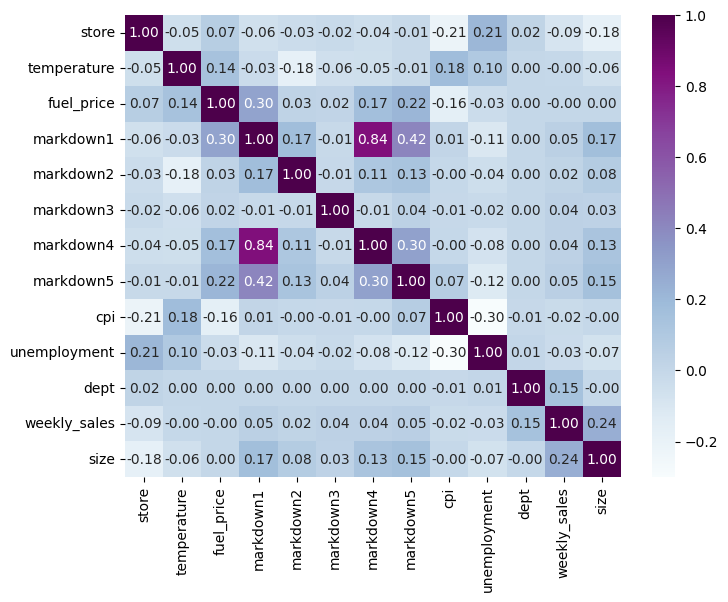

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# Numerical Data
corr_= df[numeric_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

In [57]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
category_column =['type','size','store']

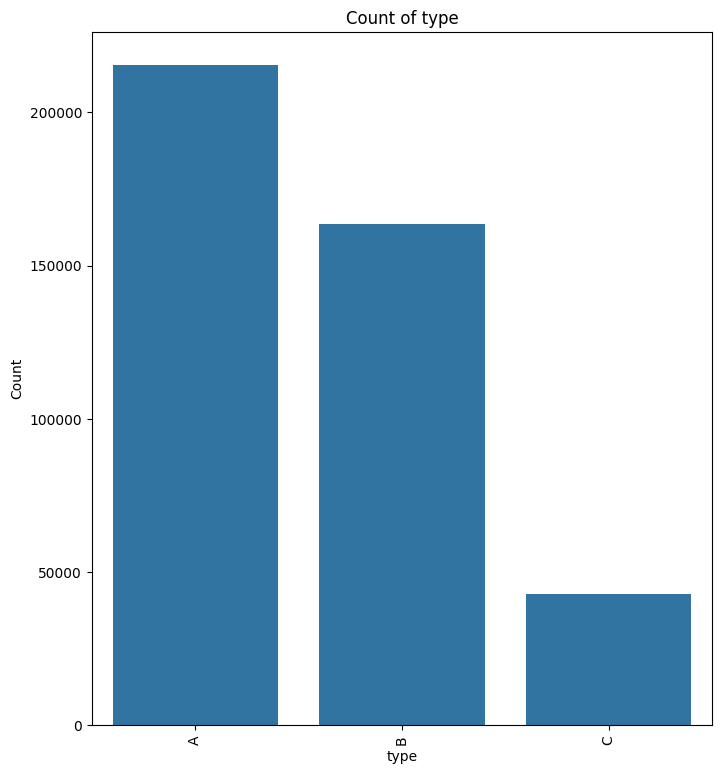

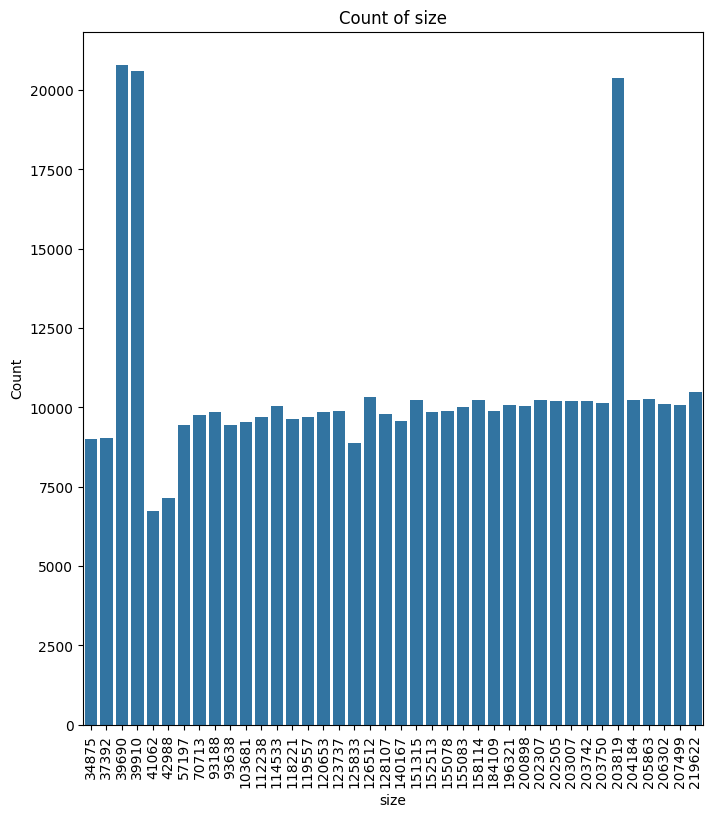

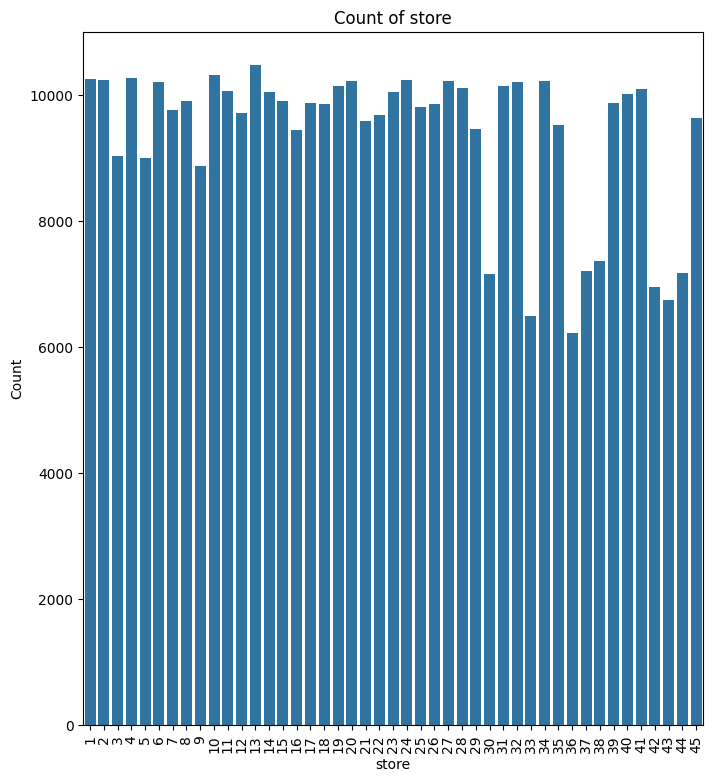

In [59]:
for feature in category_column:
    plt.figure(figsize=(8,9))
    sns.countplot(x=feature,data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

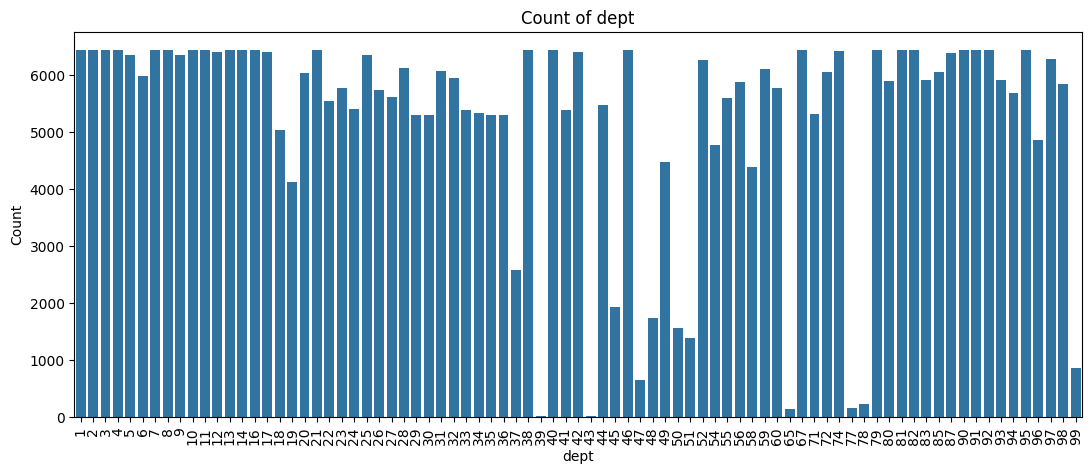

In [60]:
category_column=['dept']

for feature in category_column:
    plt.figure(figsize=(13,5))
    sns.countplot(x=feature,data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [61]:
data=df[df['type']=='C']
data

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size
286548,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,1,10158.77,C,42988
286549,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,2,12745.86,C,42988
286550,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,3,1052.98,C,42988
286551,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,4,14058.94,C,42988
286552,30,2010-02-05,39.05,2.572,0.00,0.00,0.00,0.0,0.00,210.752605,8.324,False,5,318.00,C,42988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411928,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,94,26641.59,C,39910
411929,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,95,32196.45,C,39910
411930,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,96,2983.19,C,39910
411931,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,0.0,457.74,131.193097,5.217,False,97,7054.80,C,39910


In [62]:
data.shape

(42597, 16)

In [63]:
data.store.value_counts()

store
38    7362
37    7206
44    7169
30    7156
42    6953
43    6751
Name: count, dtype: int64

In [64]:
data.dept.value_counts()


dept
1     858
92    858
91    858
38    858
40    858
     ... 
99     21
29     16
71     16
19      1
35      1
Name: count, Length: 66, dtype: int64

FEATURES BY WEEKLY SALES

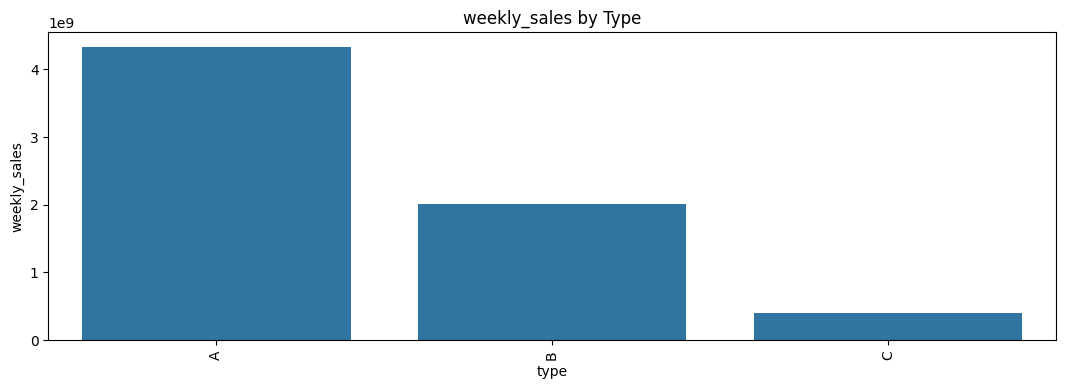

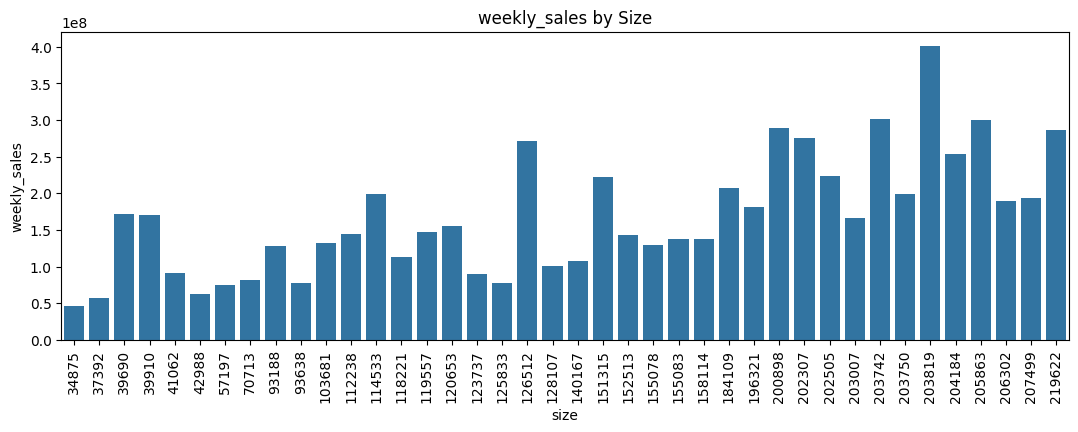

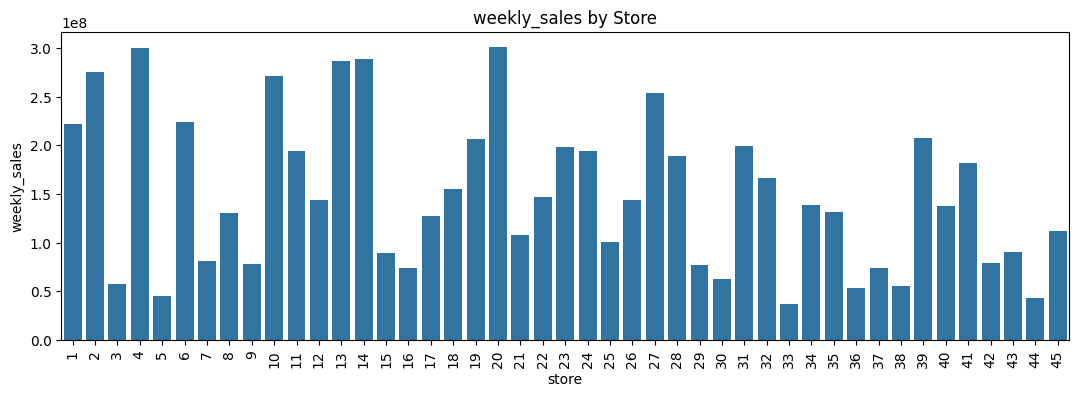

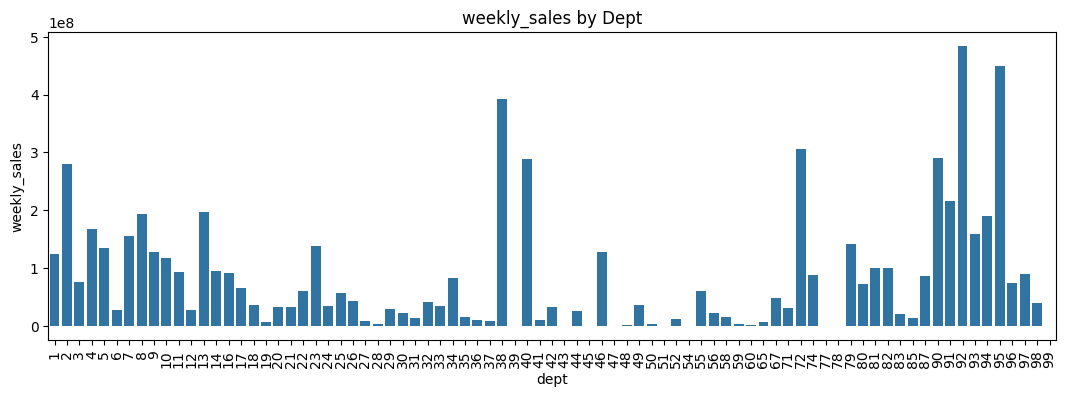

In [65]:
category_columns=['type','size','store','dept']


for feature in category_columns:
    plt.figure(figsize=(13,4))

    agg_df=df.groupby(feature)['weekly_sales'].sum().reset_index()
    sns.barplot(x=feature,y='weekly_sales',data=agg_df)
    plt.title(f'weekly_sales by {feature.capitalize()}')
    plt.xlable=feature.capitalize()
    plt.ylabel='weekly_sales'
    plt.xticks(rotation=90)
    plt.show()


In [66]:
df.type.unique()

array(['A', 'B', 'C'], dtype=object)

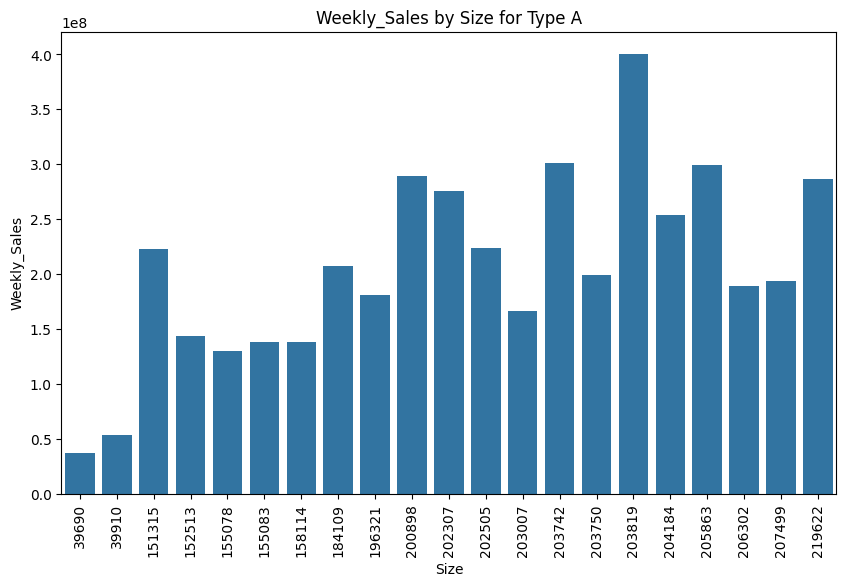

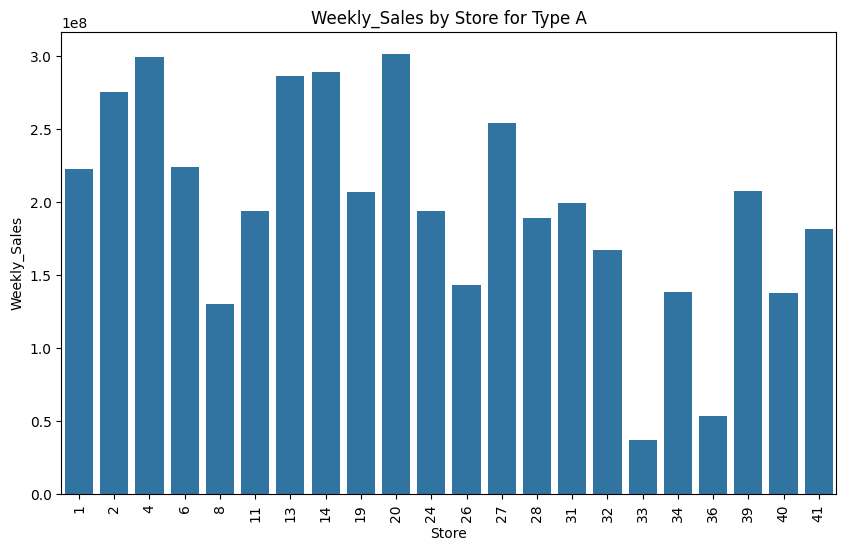

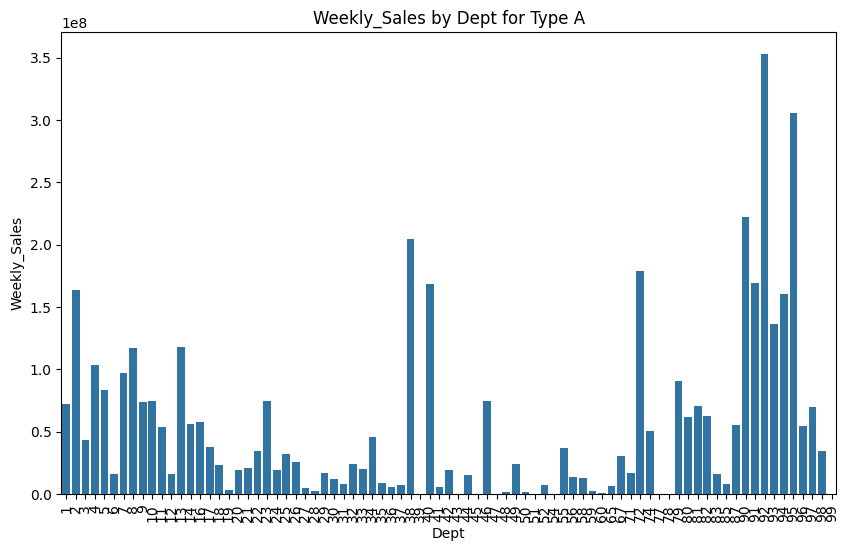

In [67]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains a column named 'type'
# Filter the DataFrame to only include rows where 'type' is 'A'
df_type_a=df[df['type'] == 'A']

# Specify the features for which you want bar plots
category_column = ['size', 'store', 'dept']

# Loop through each feature and create a bar plot with 'weekly_sales' as y-label
for feature in category_column:
    # Aggregate the weekly sales by the feature
    agg_df =df_type_a.groupby(feature)['weekly_sales'].sum().reset_index()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='weekly_sales', data=agg_df)
    plt.title(f'Weekly_Sales by {feature.capitalize()} for Type A')
    plt.xlabel(feature.capitalize())
    plt.ylabel = plt.gca().set_ylabel
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=90)

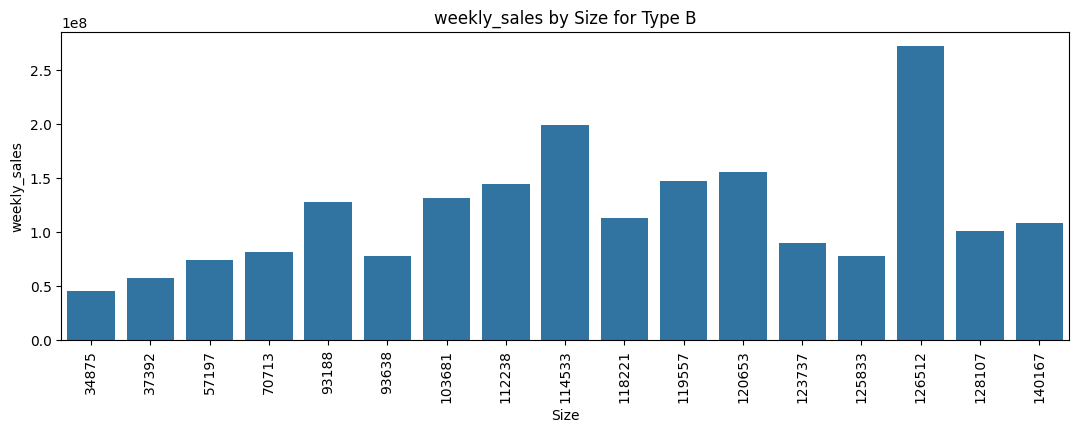

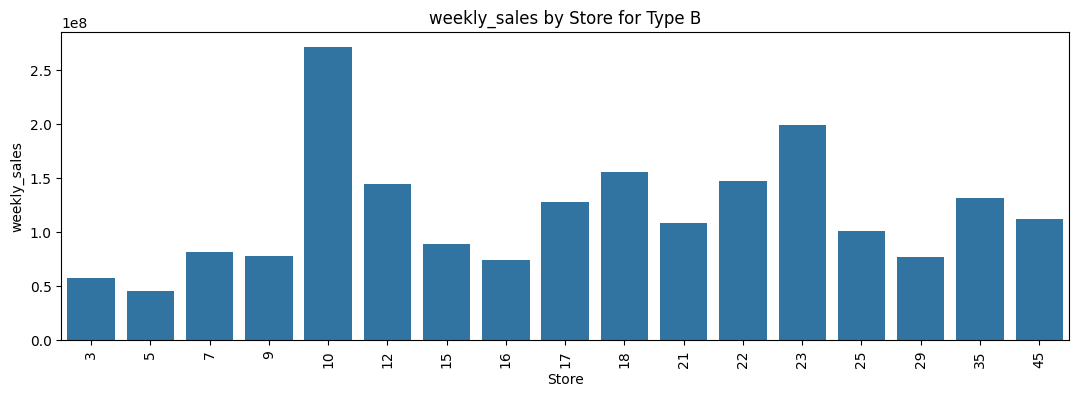

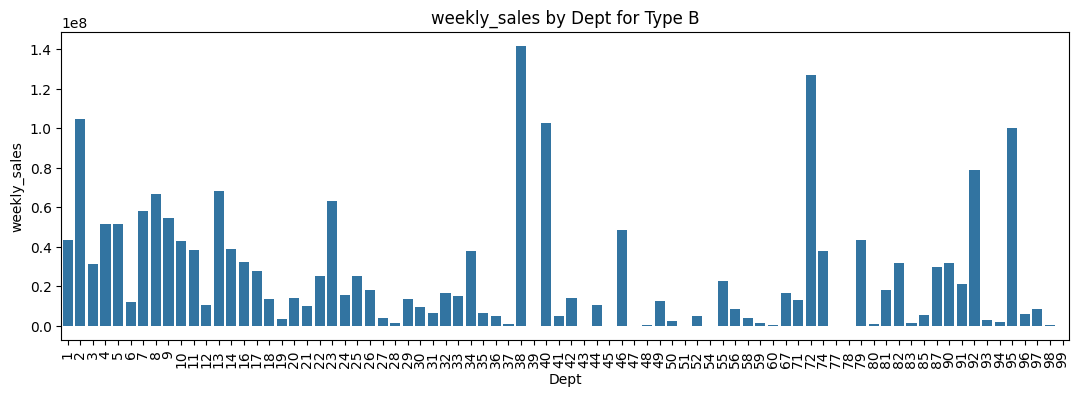

In [68]:
data_type_b=df[df['type']=='B']

category_column=['size','store','dept']

for feature in category_column:
    plt.figure(figsize=(13,4))
    agg_df_2=data_type_b.groupby(feature)['weekly_sales'].sum().reset_index()

    sns.barplot(x=feature, y='weekly_sales', data=agg_df_2)
    plt.title(f'weekly_sales by {feature.capitalize()} for Type B')
    plt.xlabel(feature.capitalize())
    plt.ylabel('weekly_sales')
    plt.xticks(rotation=90)
    plt.show()

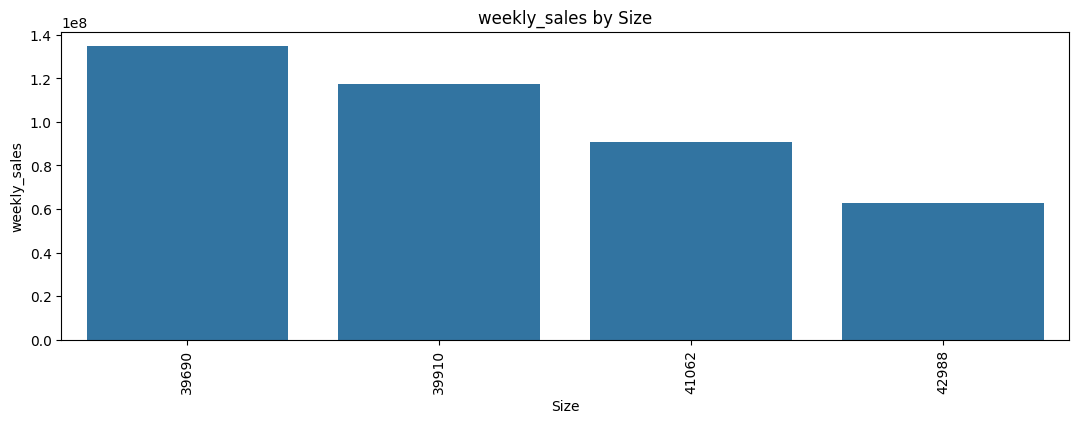

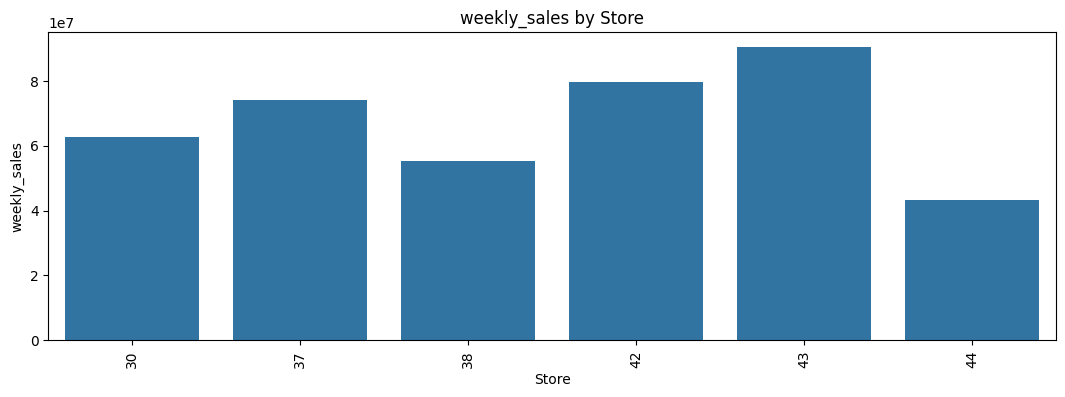

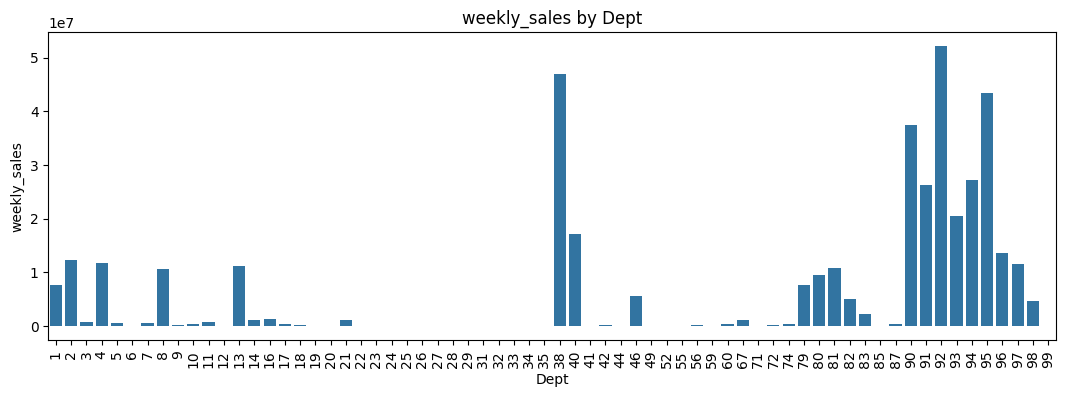

In [69]:
df_type_c=df[df['type']=='C']

category_column=['size','store','dept']

for feature in category_column:

    agg_df=df_type_c.groupby (feature)['weekly_sales'].sum().reset_index()
    plt.figure(figsize=(13,4))
    sns.barplot(x=feature,  y='weekly_sales',data=agg_df)
    plt.title(f'weekly_sales by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('weekly_sales')
    plt.xticks(rotation=90)
    plt.show()

In [70]:
df[df['dept']==93]['weekly_sales'].sum()

159698663.19

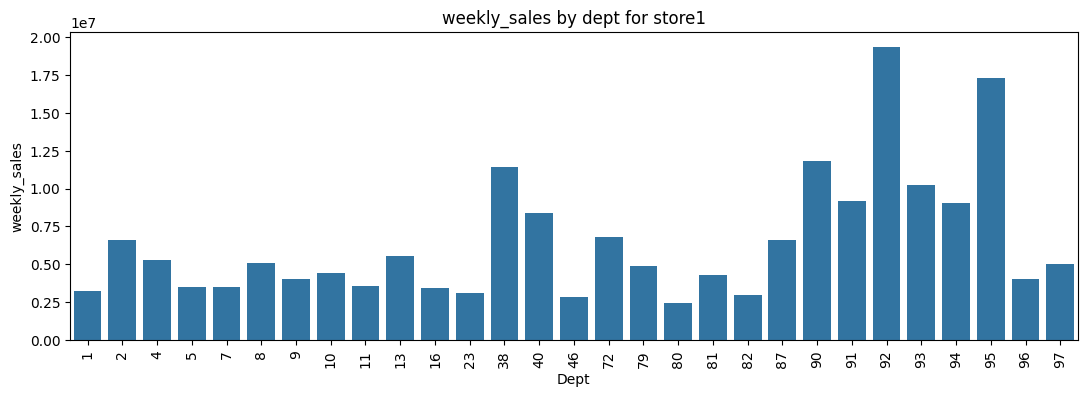

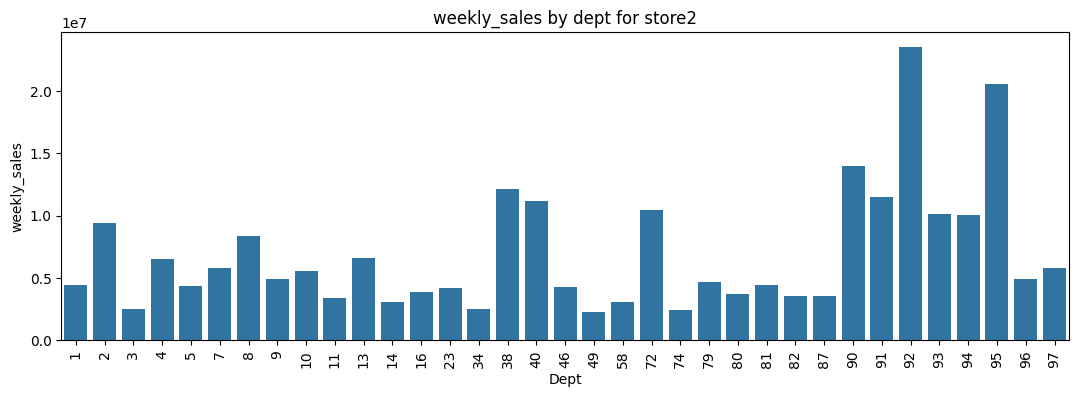

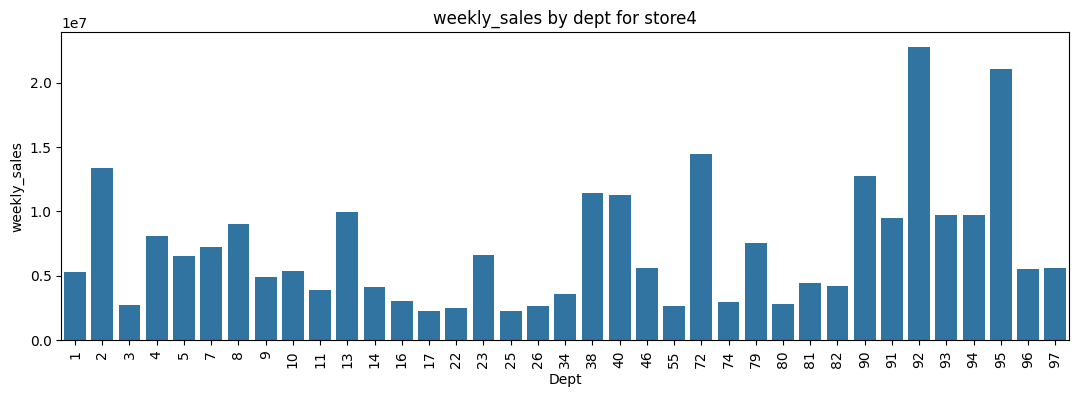

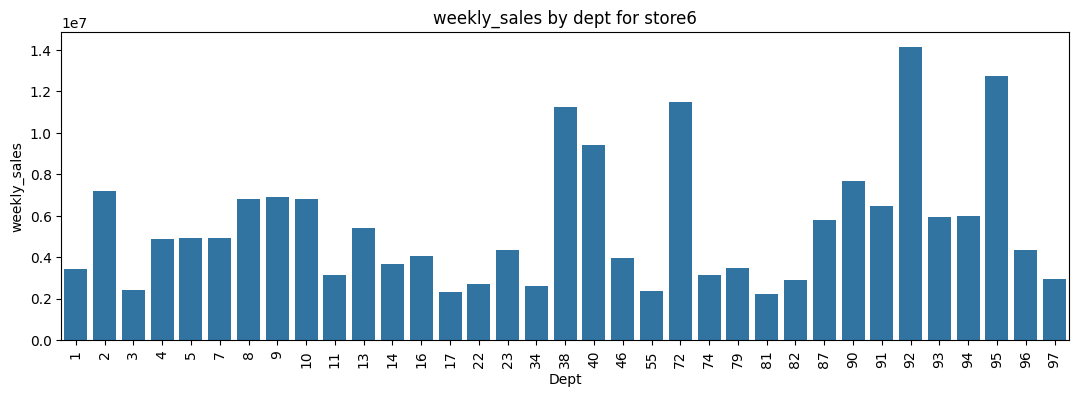

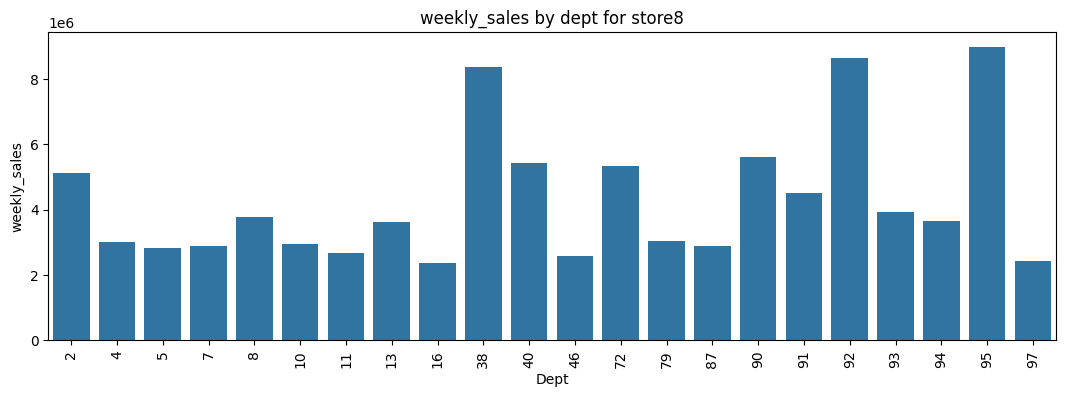

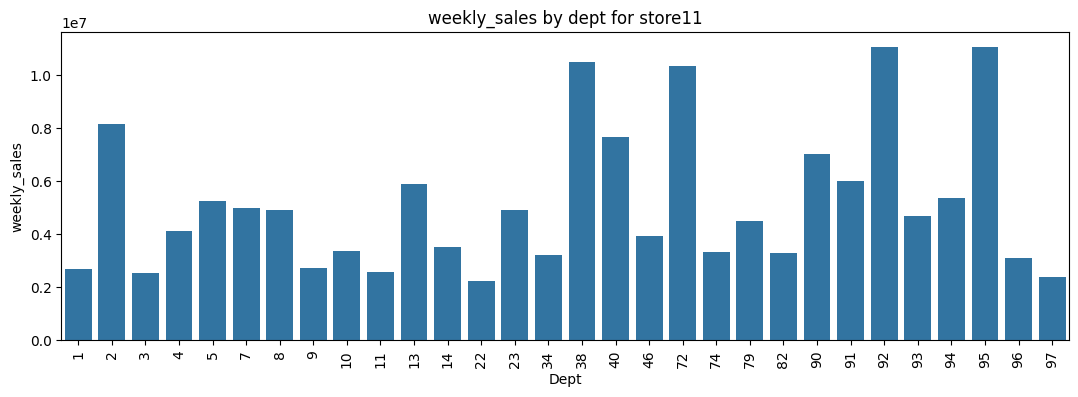

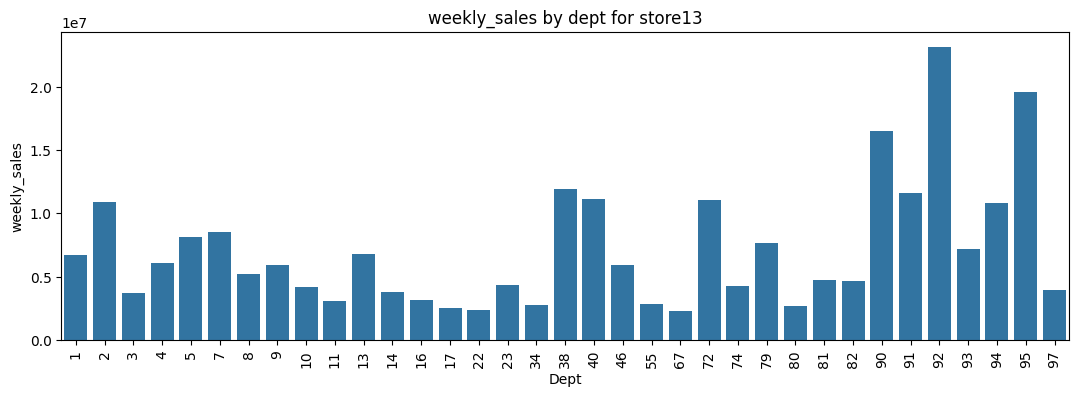

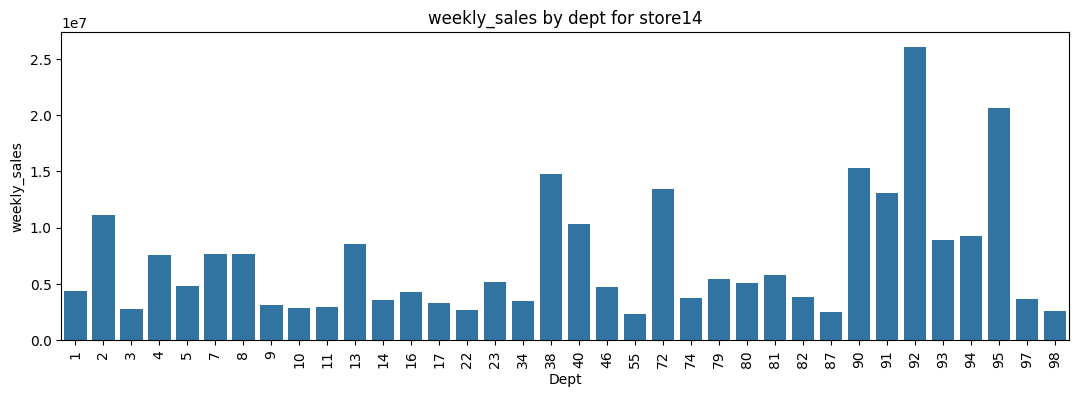

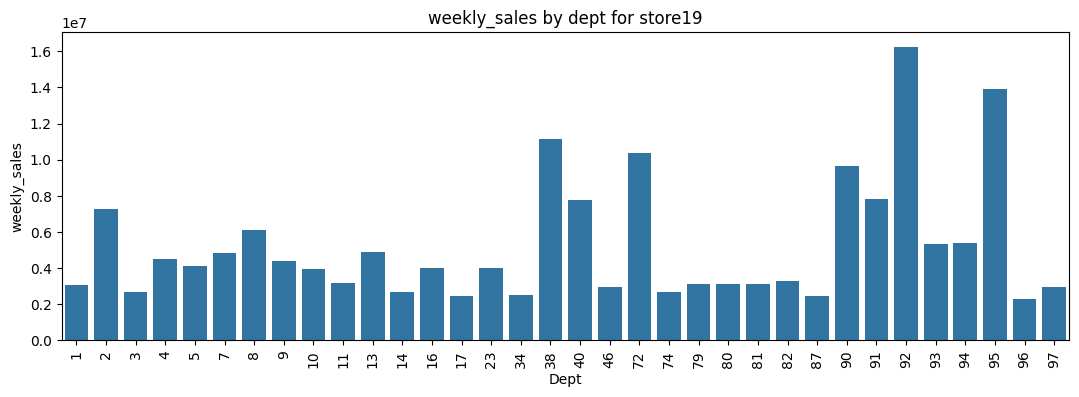

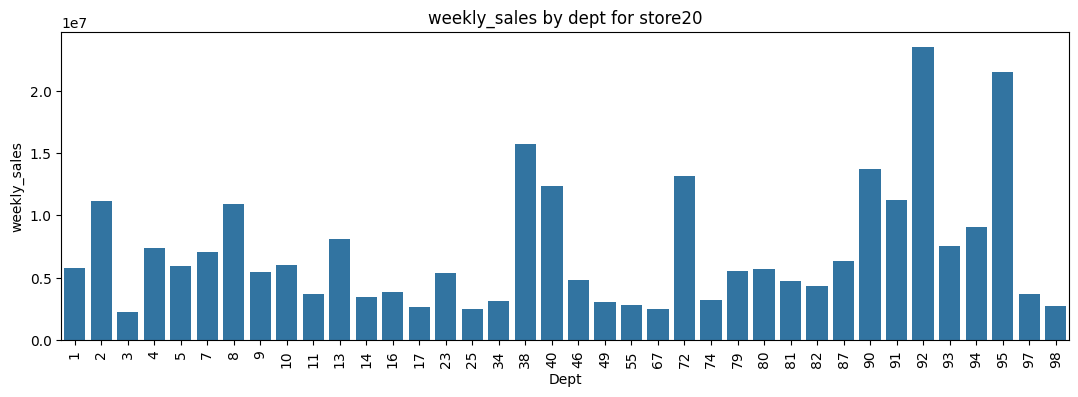

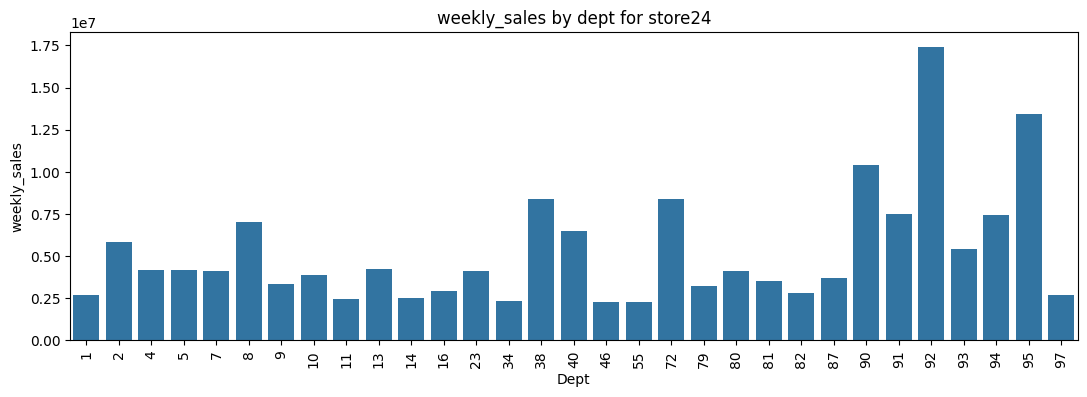

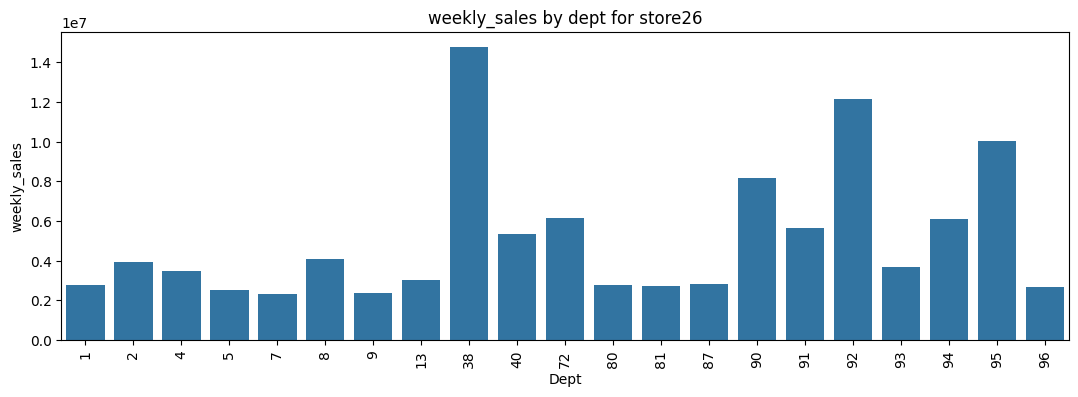

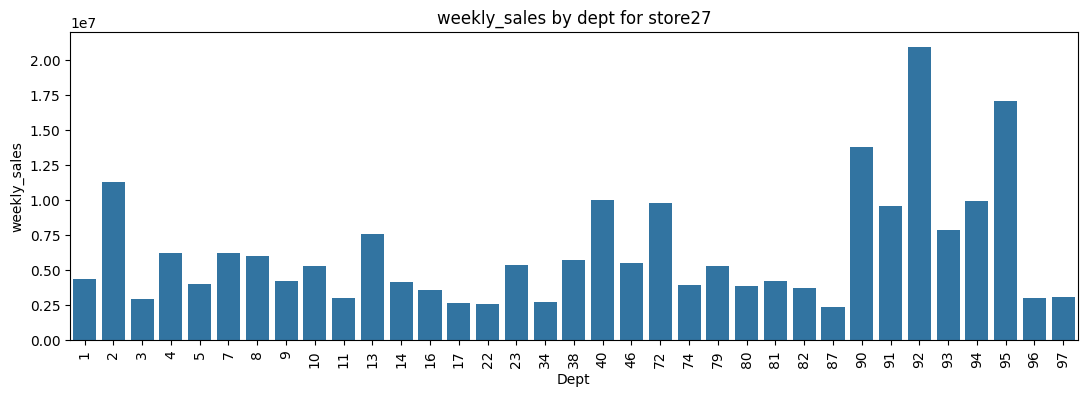

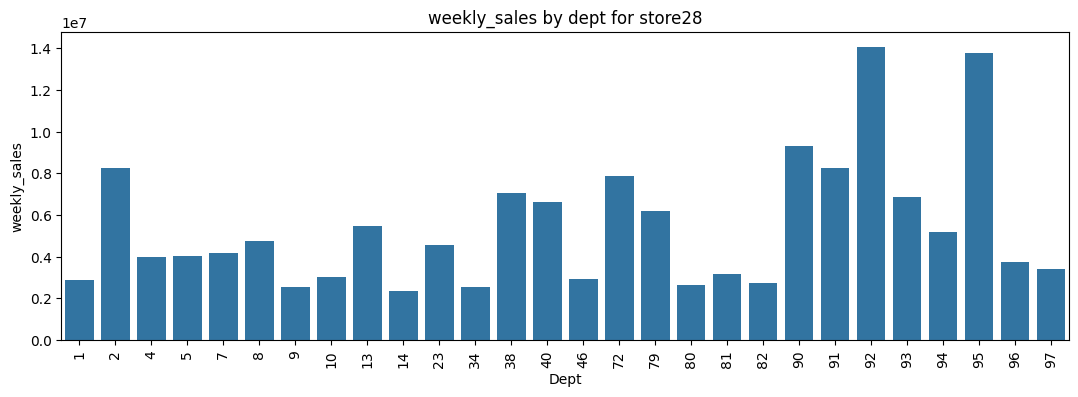

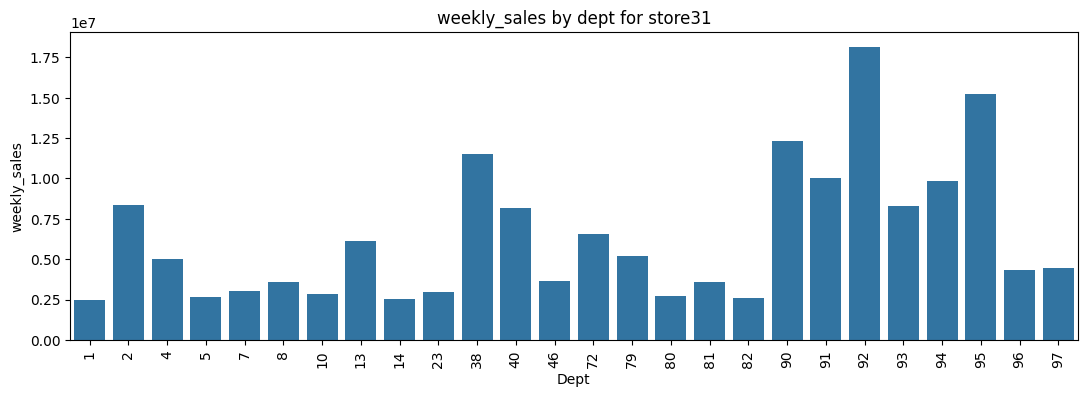

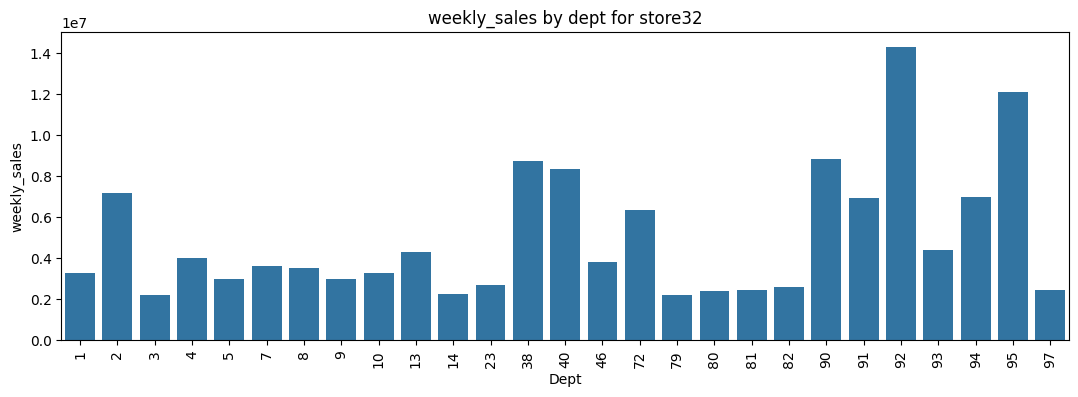

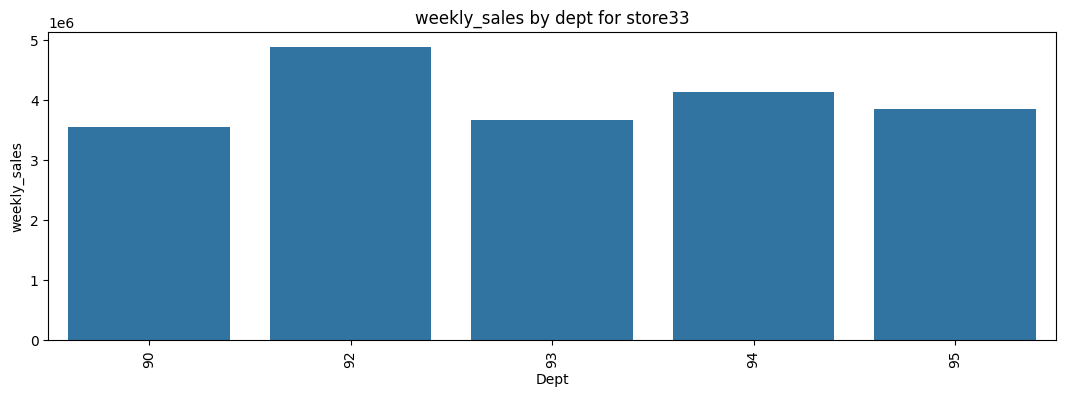

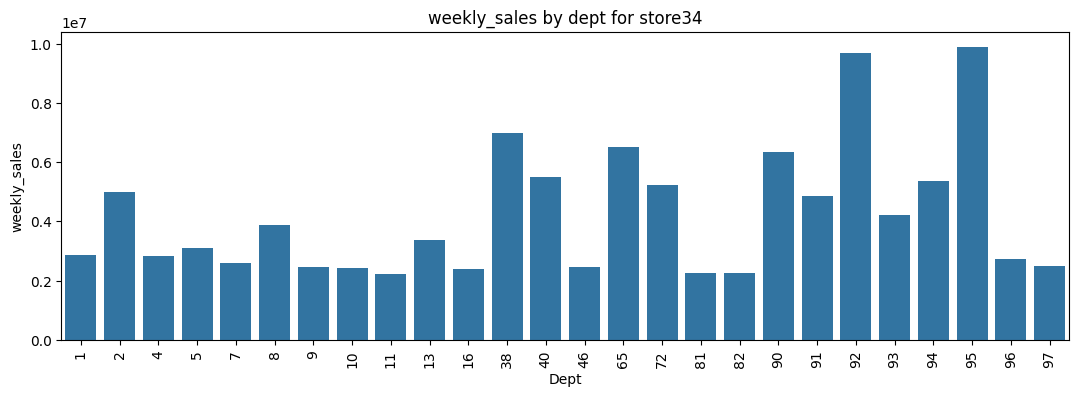

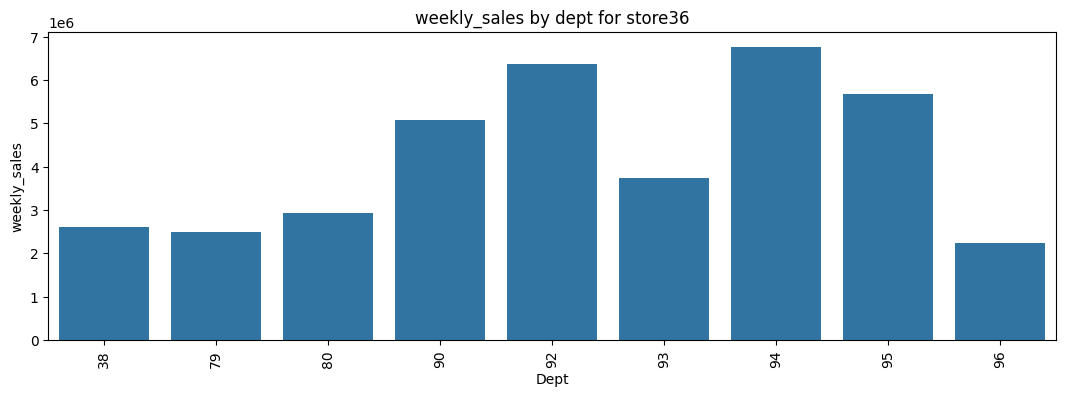

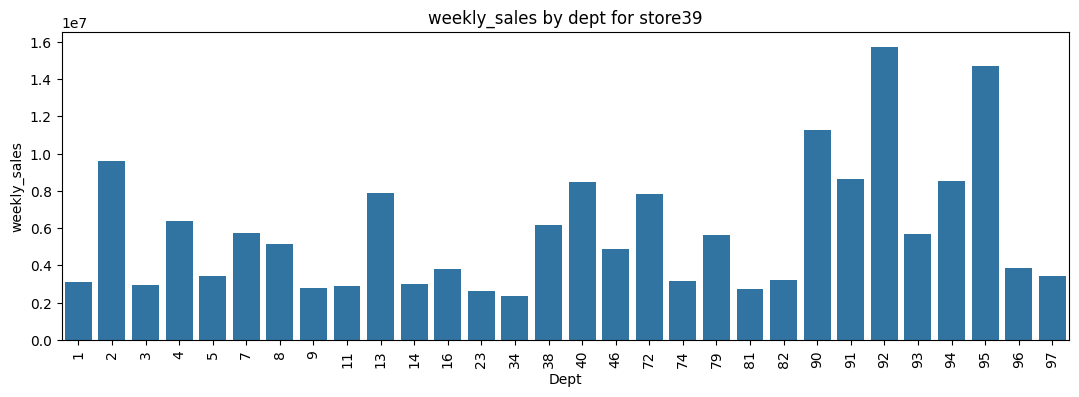

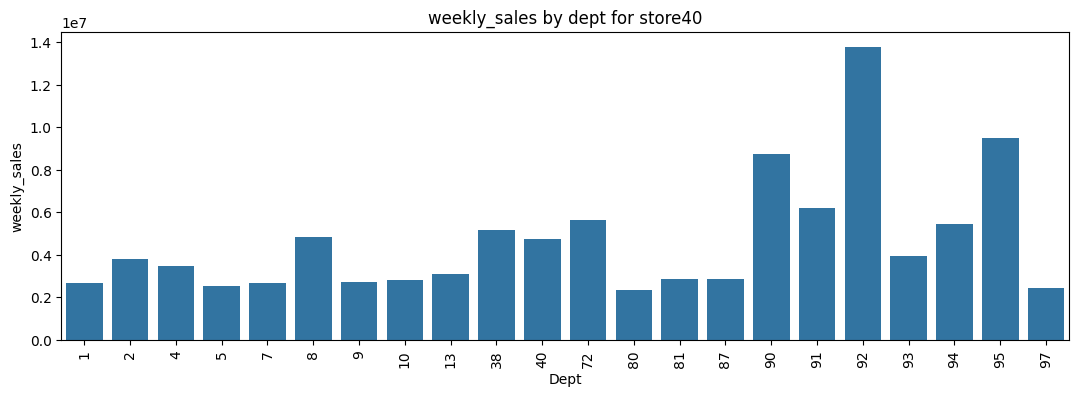

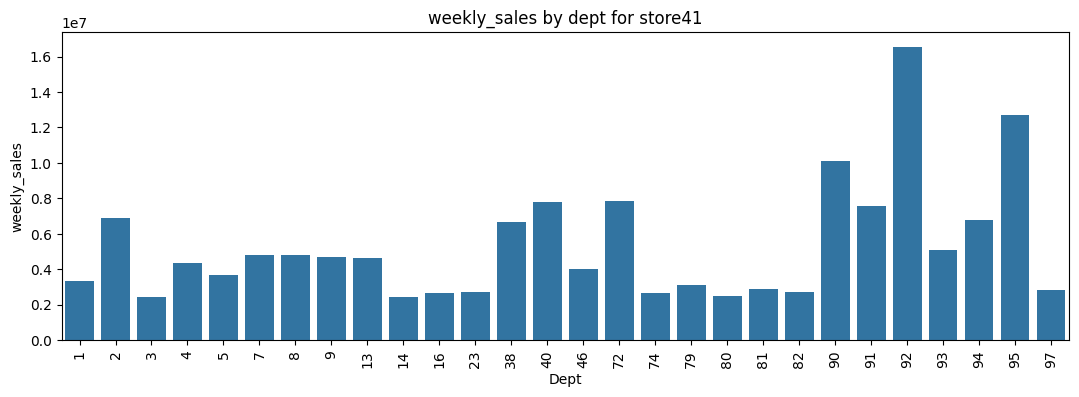

In [71]:
data_type_a=df[df['type']=='A']

agg_df=data_type_a.groupby(['store','dept'])['weekly_sales'].sum().reset_index()
agg_df_filtered=agg_df[agg_df['weekly_sales']>2.20987e+06]
stores=agg_df_filtered['store'].unique()

for store in stores:
    plt.figure(figsize=(13,4))

    store_data=agg_df_filtered[agg_df_filtered['store']==store]

    sns.barplot(x='dept',y='weekly_sales',data=store_data)
    plt.title(f'weekly_sales by dept for store{store}')
    plt.xlabel('Dept')
    plt.ylabel('weekly_sales')
    plt.xticks(rotation=90)
    plt.show()

In [72]:
agg_df.describe()

,store,dept,weekly_sales
count,1671.000000,1671.000000,1.671000e+03
mean,21.966487,45.884500,2.591870e+06
std,12.775072,29.982337,3.538168e+06
min,1.000000,1.000000,-2.562000e+03
25%,11.000000,21.000000,3.276960e+05
50%,24.000000,41.000000,1.209878e+06
75%,33.000000,74.000000,3.422059e+06
max,41.000000,99.000000,2.610150e+07


IDDENTIFYING AVERAGE CUSTOMER VISIT IN Y=THE TYPE B STORE IN APRIL MONTHS

In [73]:
df_type_b=df[df['type']=="B"]

df_type_b_april=df_type_b[df_type_b['date'].dt.month==4]

average_sales_april=df_type_b_april['weekly_sales'].mean()

average_sales_april

11924.820053101768

IDENTIFYING BEST AVERAGE SALES IN HOLIDAY WEEK FOR ALL STORE TYPES

In [74]:
df_holiday=df[df['isholiday']==True]

average_sales_holiday= df_holiday.groupby('type')['weekly_sales'].mean()

best_avg_sales_type=average_sales_holiday.idxmax()
best_avg_sales_values=average_sales_holiday.max()

best_avg_sales_type,best_avg_sales_values

('A', 21297.51782416859)

FINDING WHICH STORE HAD A WORST SALES IN LEAP YEAR

In [75]:
leap_year=[year for year in range(2000,2101)if (year % 4 == 0 and year % 100 != 0)]

df_leap_years=df[df['date'].dt.year.isin(leap_year)]

if df_leap_years.empty:
    print('No data available for leap years in the dataset')
else:
    store_sales_leap_years=df_leap_years.groupby('store')['weekly_sales'].sum()

    worst_sales_store=store_sales_leap_years.idxmin()
    worst_sales_value=store_sales_leap_years.min()

    print(f'Store with the worst sales in leap years:{worst_sales_store}')
    print(f'worst sales value in leap year:{worst_sales_value}')
    

Store with the worst sales in leap years:33
worst sales value in leap year:11435551.03


Find the store with the maximum sum of weekly sales

In [76]:
max_store=df.groupby('store')['weekly_sales'].sum().idxmax()

# Calculate 25% of the weekly sales of the store with the maximum sum

thershold= 0.25*df.groupby('store')['weekly_sales'].sum().loc[max_store]

# Filter out the stores below 25% of the max store's weekly sales

below_thershold_store= df.groupby('store')['weekly_sales'].sum().loc[lambda x: x<thershold].index

print("Stores below 25% of the store with the maximum sum of weekly sales:")
print(below_thershold_store)


Stores below 25% of the store with the maximum sum of weekly sales:
Index([3, 5, 16, 30, 33, 36, 37, 38, 44], dtype='int64', name='store')


In [77]:
# Filter out the rows for the stores below 25% of the max store's weekly sales

below_thershold_store_df=df[df['store'].isin(below_thershold_store)]

store_types = below_thershold_store_df.groupby('store')['type'].first()
print('Type of store below 25% of the store with the maximum sum of weekly sales:')

print(store_types)

Type of store below 25% of the store with the maximum sum of weekly sales:
store
3     B
5     B
16    B
30    C
33    A
36    A
37    C
38    C
44    C
Name: type, dtype: object


IDENTIFYING,WHAT IS THE EXPECTED SALES OF EACH DEPARTMENT WHEN UNEMPLOYMENT FACTORE IS GREATER >8

In [78]:
# Define the unemployment rate threshold

unemployment_thershold= df['unemployment'].mean()
filtered_df=df[df['unemployment']>unemployment_thershold]

expected_sales_by_dept= filtered_df.groupby('dept')['weekly_sales'].mean()

print('Expecte4d sales of each department when the unemployment factor is greater than thershold')
print(expected_sales_by_dept)

Expecte4d sales of each department when the unemployment factor is greater than thershold
dept
1     17723.870339
2     43438.570078
3     11094.697130
4     25120.851801
5     19859.029007
          ...     
95    68615.460195
96    15571.326511
97    13150.591941
98     6266.336566
99      340.256400
Name: weekly_sales, Length: 81, dtype: float64


AGGREGATING THE NET(TOTAL)SALES OF EACH DEPARTMENT ON MONTH WISE

In [79]:
df['date']=pd.to_datetime(df['date'])

df['month_year']=df['date'].dt.to_period('M')

monthly_sales= df.groupby(['month_year','dept'])['weekly_sales'].sum().reset_index()
print('Monthly net sales of each department:')
print(monthly_sales)

Monthly net sales of each department:
     month_year  dept  weekly_sales
0       2010-02     1    4138664.75
1       2010-02     2    7658267.17
2       2010-02     3    1739169.28
3       2010-02     4    4470499.52
4       2010-02     5    4231371.27
...         ...   ...           ...
2589    2012-10    95   12315979.20
2590    2012-10    96    2147132.34
2591    2012-10    97    2570324.74
2592    2012-10    98    1171256.97
2593    2012-10    99      13654.02

[2594 rows x 3 columns]


IDENTIFYING WHICH STORE PERFORMS HIGH SALES IN WEEK WISE

In [80]:
weekly_sales =df.groupby(['store','date'])['weekly_sales'].sum().reset_index()

max_weekly_sales= weekly_sales.loc[weekly_sales.groupby('date')['weekly_sales'].idxmax()]

store_total_sales = df.groupby('store')['weekly_sales'].sum().reset_index().sort_values(by='weekly_sales', ascending=False)

print('Store wwith the highest sales week by week:')
print(max_weekly_sales)

print("\nSum of weekly sales for each unique store:")
print(store_total_sales)

Store wwith the highest sales week by week:
      store       date  weekly_sales
1859     14 2010-02-05    2623469.95
430       4 2010-02-12    2188307.39
1861     14 2010-02-19    2204556.70
1862     14 2010-02-26    2095591.63
1863     14 2010-03-05    2237544.75
...     ...        ...           ...
567       4 2012-09-28    2027620.23
2856     20 2012-10-05    2246411.89
2857     20 2012-10-12    2162951.36
570       4 2012-10-19    2097266.85
571       4 2012-10-26    2149594.46

[143 rows x 3 columns]

Sum of weekly sales for each unique store:
    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1

IDENTIFYING BETTER DEPARTMENT PERFORMANCE BASED ON THE STORE ON ALL THE WEEK

In [81]:
store_dept_sales= df.groupby(['store',"dept"])['weekly_sales'].sum().reset_index()

max_dept_sales = store_dept_sales.loc[store_dept_sales.groupby('store')['weekly_sales'].idxmax()]

sorted_dept_sales = store_dept_sales.groupby('dept')['weekly_sales'].sum().reset_index().sort_values(by='weekly_sales', ascending=False)

print('Department with the highest total sales for each store:')
print(max_dept_sales)
print("\n  Sorted departments based on their total sales across all stores:")
print(sorted_dept_sales)


Department with the highest total sales for each store:
      store  dept  weekly_sales
69        1    92   19370632.64
147       2    92   23572153.03
190       3    38   15529566.07
297       4    92   22789210.43
340       5    38    7893570.24
446       6    92   14160545.90
509       7    72    6447844.96
601       8    95    9002059.31
641       9    38   11184287.78
736      10    72   20410926.56
829      11    95   11080680.91
835      12     2   10652763.01
980      13    92   23170876.20
1057     14    92   26101497.71
1101     15    38    7517821.66
1179     16    38    7447254.23
1255     17    38   11059588.03
1331     18    38    9339684.03
1445     19    92   16261990.45
1523     20    92   23542625.04
1532     21     2    6832625.68
1643     22    38   10015536.66
1740     23    72   10988695.25
1830     24    92   17429136.57
1874     25    38    6381753.99
1950     26    38   14800243.10
2061     27    92   20952094.22
2138     28    92   14083635.33
2181     29    3

IDENTIFYING THE STORE WHICH HAS MINIMUM FUEL PRICE BASED ON THE WEEK

In [82]:
min_fuel_price_by_week= df.groupby(['store','date'])['fuel_price'].min().reset_index()
min_fuel_store_by_week= min_fuel_price_by_week.loc[min_fuel_price_by_week.groupby('date')['fuel_price'].idxmin()]

print('Store with the minimum fuel price based on the week:')
print(min_fuel_store_by_week)

Store with the minimum fuel price based on the week:
      store       date  fuel_price
5005     36 2010-02-05       2.545
5006     36 2010-02-12       2.539
5007     36 2010-02-19       2.472
5008     36 2010-02-26       2.520
5009     36 2010-03-05       2.574
...     ...        ...         ...
5143     36 2012-09-28       3.660
5144     36 2012-10-05       3.611
5145     36 2012-10-12       3.576
5146     36 2012-10-19       3.570
5147     36 2012-10-26       3.494

[143 rows x 3 columns]


In [83]:
sum_fuel_price_by_week=df.groupby(['store','date'])['fuel_price'].sum().reset_index()
min_sum_fuel_price_by_week=sum_fuel_price_by_week.loc[sum_fuel_price_by_week.groupby('date')['fuel_price'].idxmin()]

store_with_min_sum_fuel_price=min_sum_fuel_price_by_week.loc[min_sum_fuel_price_by_week['fuel_price'].idxmin()]
print('Store with minimum sum of fuel prices based on every week:') 
print(store_with_min_sum_fuel_price)

Store with minimum sum of fuel prices based on every week:
store                          36
date          2010-02-19 00:00:00
fuel_price                 93.936
Name: 5007, dtype: object


IDENTIFYING OVERALL PERFORMANCE OF THE STORE BASED ON YEAR WISE

In [84]:
df['date']= pd.to_datetime(df['date'])

df['year']=df['date'].dt.year
store_yearly_sales= df.groupby(['store','year'])['weekly_sales'].sum().reset_index()

total_sales_yearly= store_yearly_sales.groupby(['store','year'])['weekly_sales'].sum().reset_index()

print('Overall performance of each store based on year wise:')
print(total_sales_yearly)

Overall performance of each store based on year wise:
     store  year  weekly_sales
0        1  2010   73278832.00
1        1  2011   80921918.83
2        1  2012   68202058.02
3        2  2010   95277864.19
4        2  2011   98607881.42
..     ...   ...           ...
130     44  2011   15498194.67
131     44  2012   14187373.72
132     45  2010   38536343.37
133     45  2011   41135367.88
134     45  2012   32723630.17

[135 rows x 3 columns]


IDENTIFYING THE PERFORMANCE OF THE STORE ON WEEK WISE WITH WITHOUT OFFERS

In [85]:

df=pd.DataFrame(df)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group by store and date, and sum the weekly sales
store_weekly_sales = df.groupby(['store', 'date'])['weekly_sales'].sum().reset_index()

# Filter rows without offers (assuming offers are indicated by markdown1 being 0)
store_weekly_sales_without_offers = store_weekly_sales[df['markdown1'] == 0]

# Calculate the total weekly sales for each store without considering offers
total_sales_without_offers = store_weekly_sales_without_offers.groupby('store')['weekly_sales'].sum().reset_index()

print("Performance of each store on a week-by-week basis without considering offers:")
print(total_sales_without_offers)

Performance of each store on a week-by-week basis without considering offers:
    store  weekly_sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38 

C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\3451764457.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  store_weekly_sales_without_offers = store_weekly_sales[df['markdown1'] == 0]


In [86]:
df_type_a.store.unique(),df_type_a.dept.unique()

(array([ 1,  2,  4,  6,  8, 11, 13, 14, 19, 20, 24, 26, 27, 28, 31, 32, 33,
        34, 36, 39, 40, 41], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
        58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
        93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64))

In [87]:
df_type_b.store.unique()

array([ 3,  5,  7,  9, 10, 12, 15, 16, 17, 18, 21, 22, 23, 25, 29, 35, 45],
      dtype=int64)

In [88]:
df.markdown1.max(),df.markdown1.min()

(88646.76, 0.0)

In [89]:
df.markdown2.max(),df.markdown2.min()

(104519.54, -265.76)

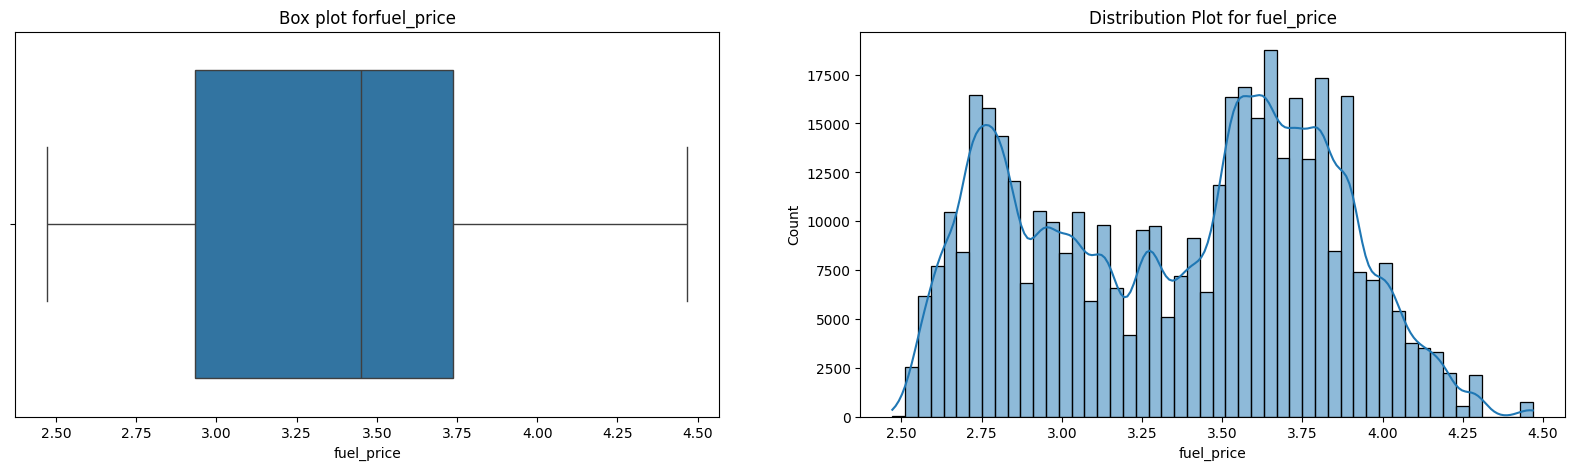

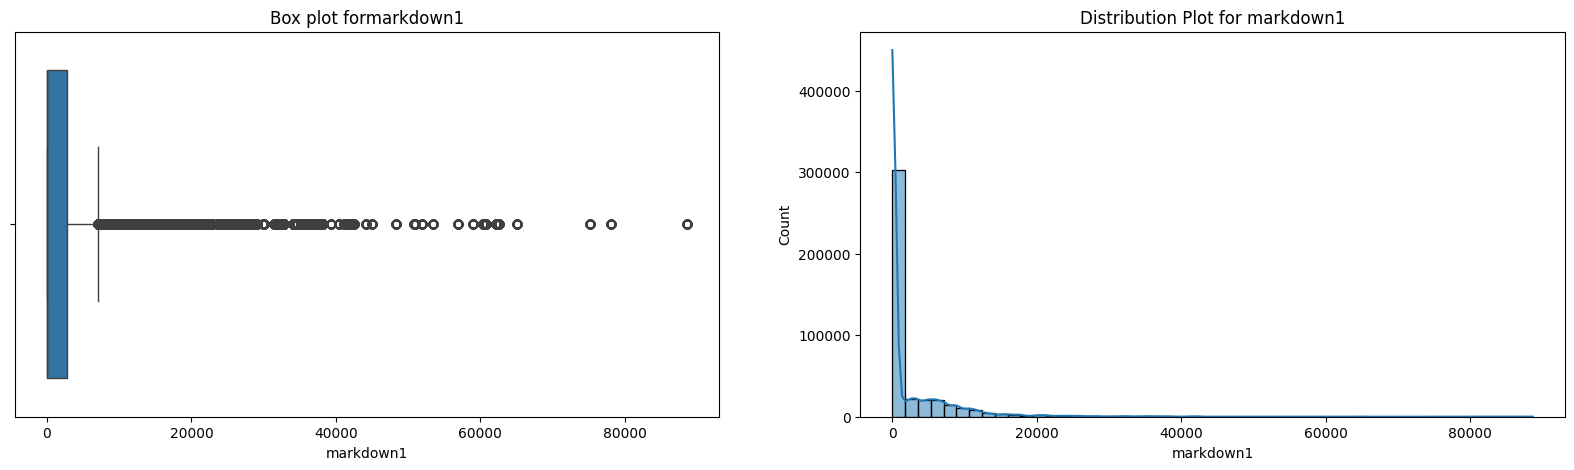

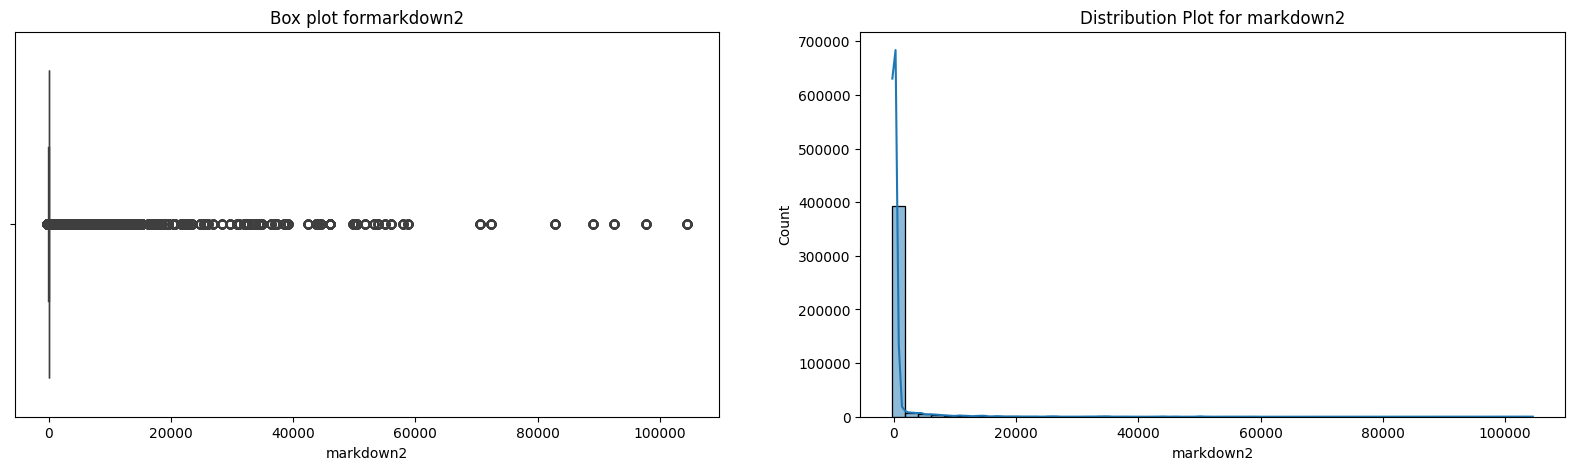

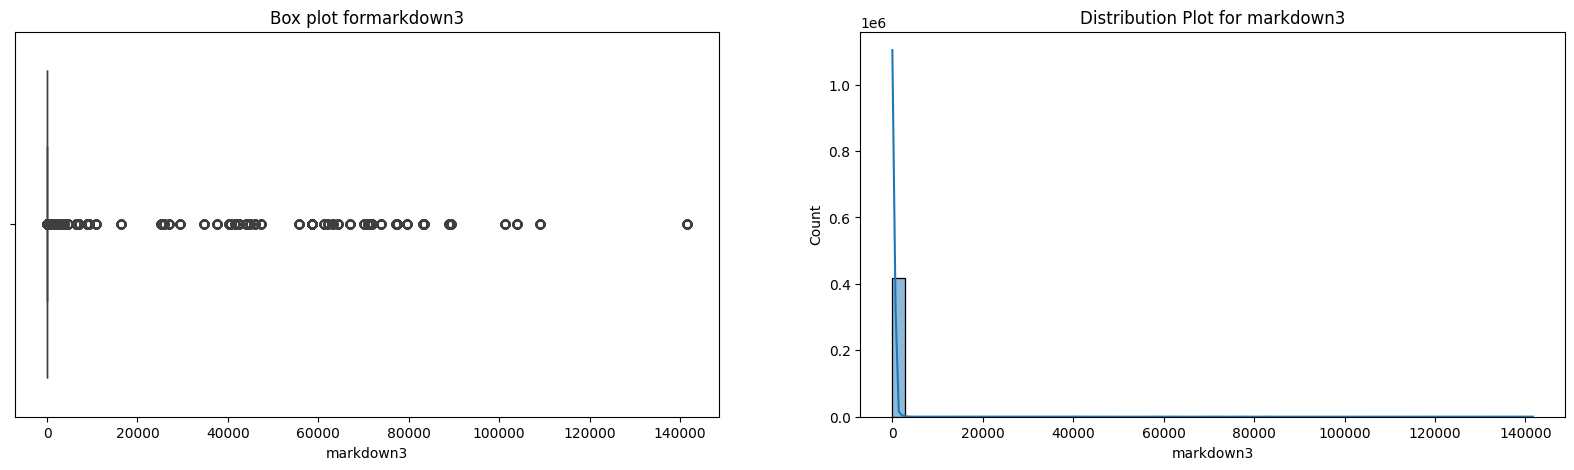

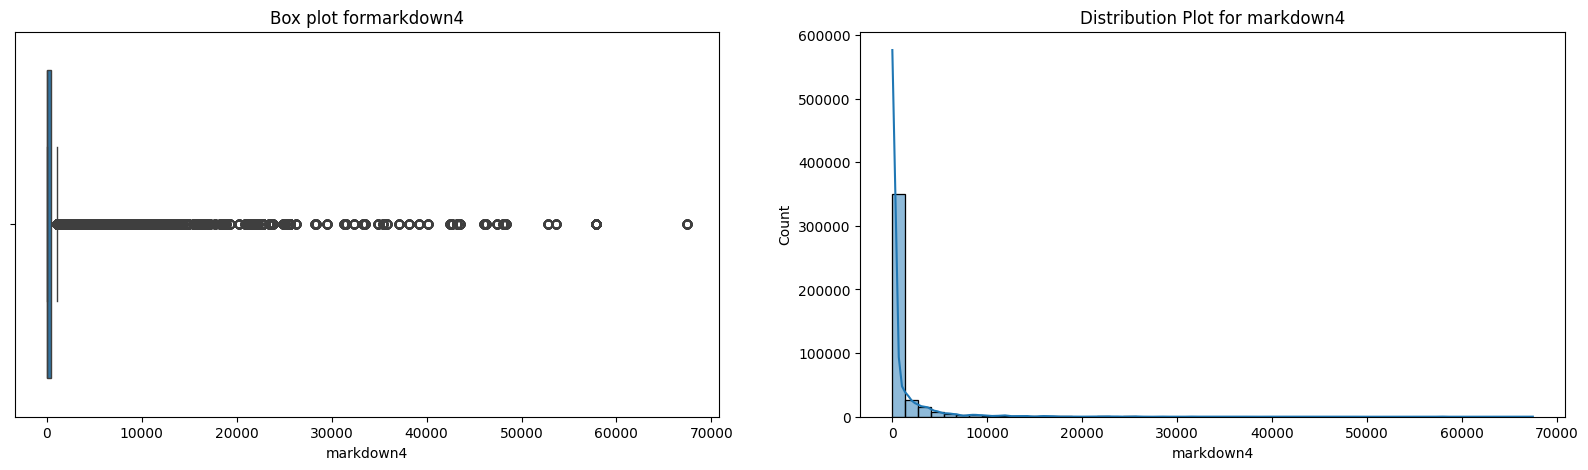

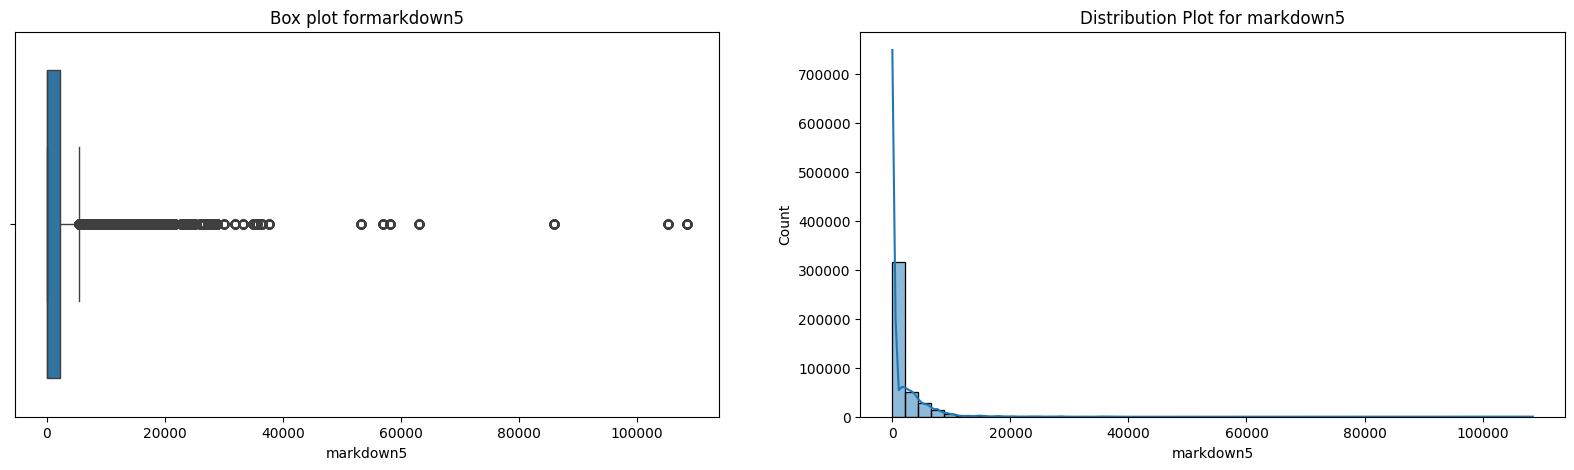

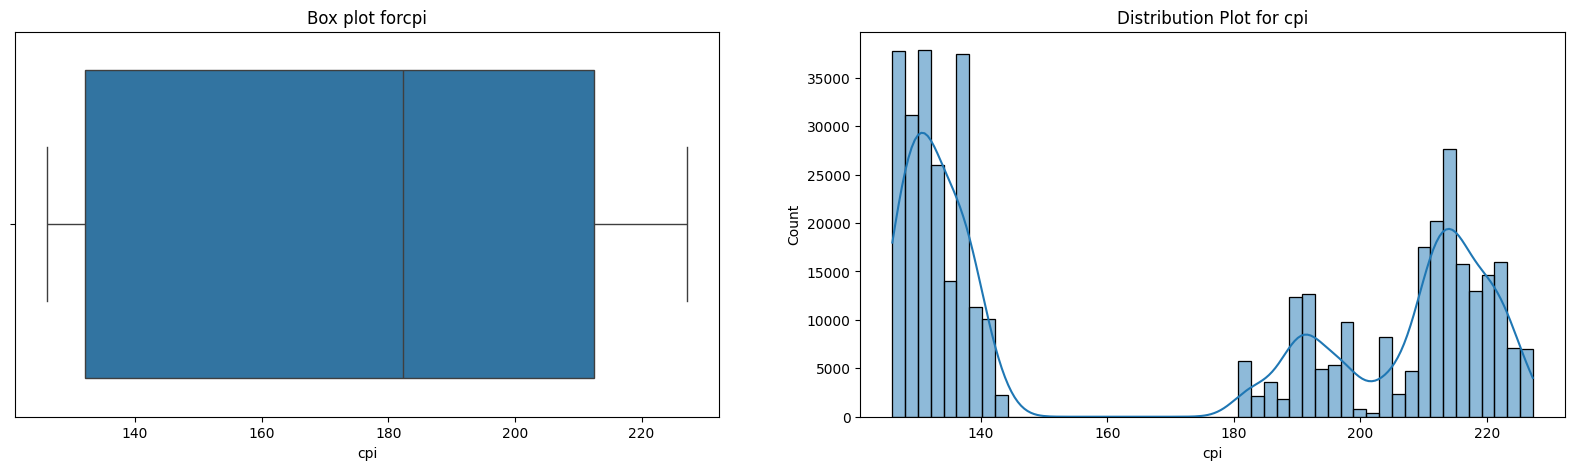

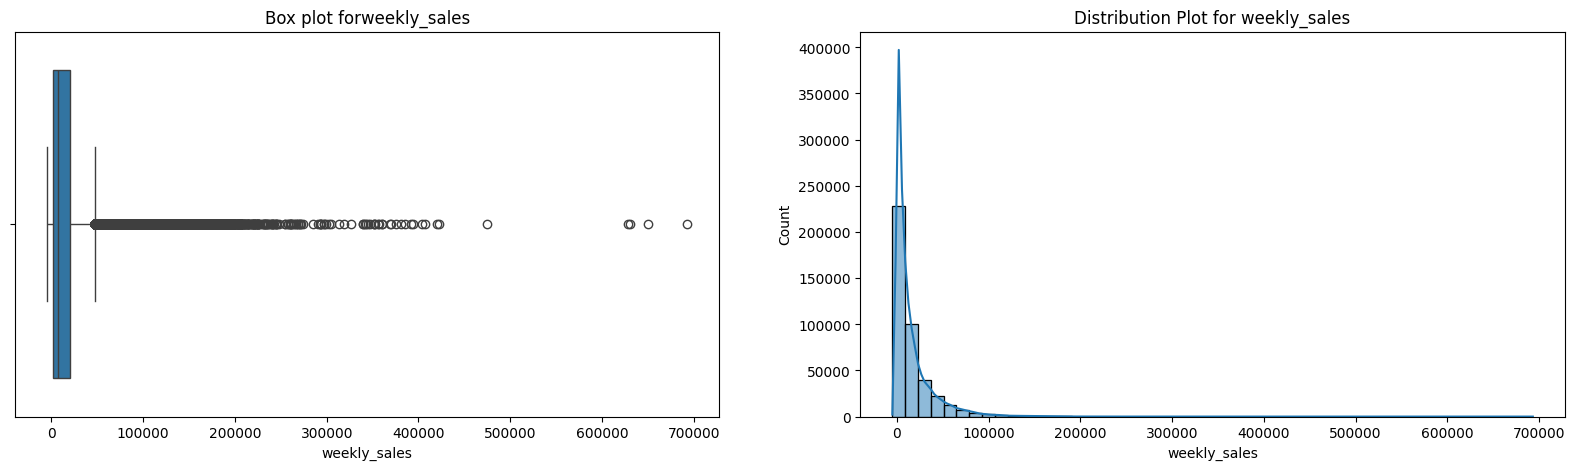

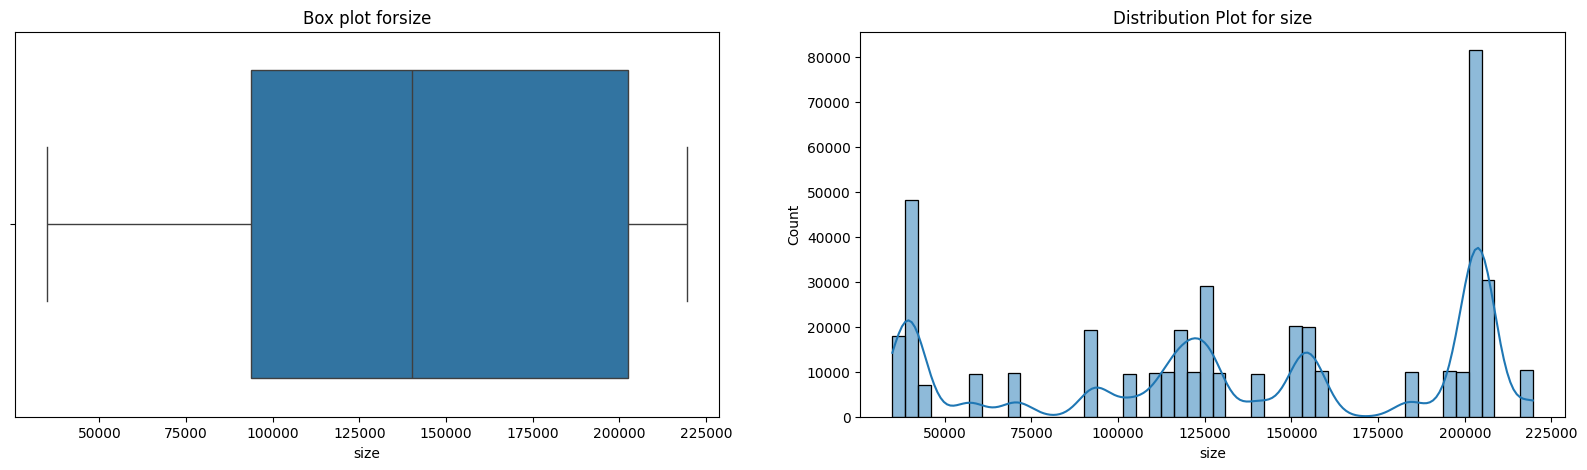

In [90]:
def plot(df,column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'Box plot for{column}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
    plt.show()

continuous_columns=['fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi', 'weekly_sales', 'size']

    # Check and plot each column
for column in continuous_columns:
        if column in df.columns:
            plot(df, column)
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")


In [91]:
df.copy()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,month_year,year
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2010-02,2010
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,A,151315,2010-02,2010
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,A,151315,2010-02,2010
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,A,151315,2010-02,2010
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,A,151315,2010-02,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221,2012-10,2012
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221,2012-10,2012
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221,2012-10,2012
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221,2012-10,2012


In [92]:

# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df1, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    print('lower_threshold:',lower_threshold,'upper_threshold:',upper_threshold)

In [93]:
df.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,month_year,year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010-02,2010
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315,2010-02,2010
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315,2010-02,2010
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315,2010-02,2010
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315,2010-02,2010


In [94]:
outlier(df, 'markdown1')
outlier(df, 'markdown2')
outlier(df, 'markdown3')
outlier(df, 'markdown4')
outlier(df, 'markdown5')
     

lower_threshold: -4213.575000000001 upper_threshold: 7022.625000000001
lower_threshold: -3.3000000000000003 upper_threshold: 5.5
lower_threshold: -6.8100000000000005 upper_threshold: 11.350000000000001
lower_threshold: -637.9350000000001 upper_threshold: 1063.2250000000001
lower_threshold: -3252.06 upper_threshold: 5420.1


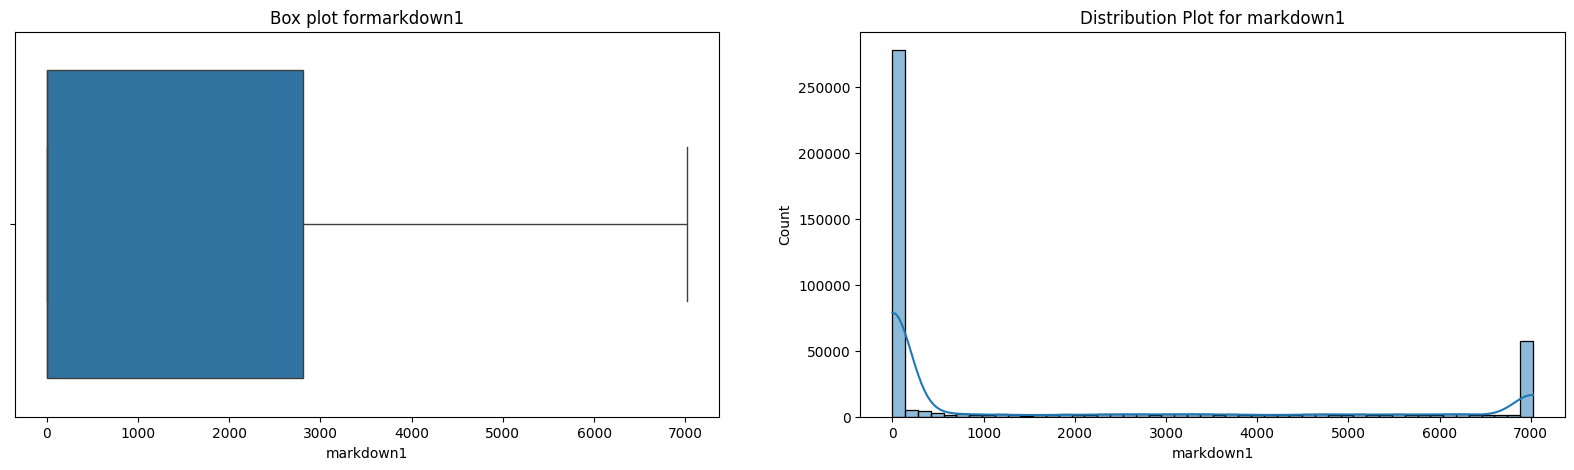

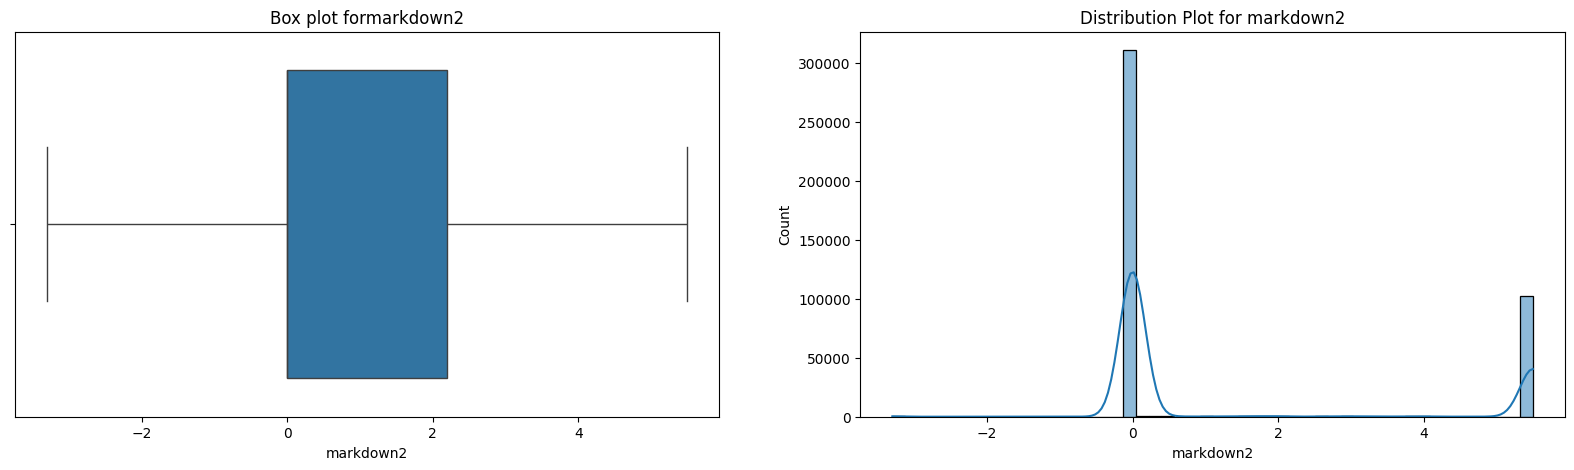

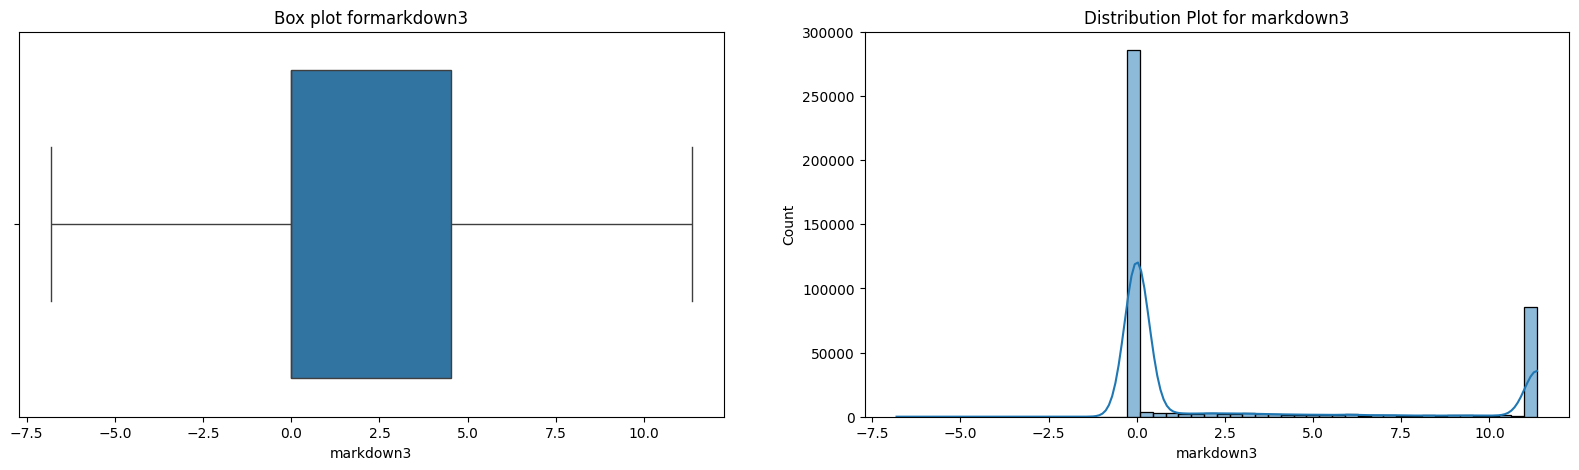

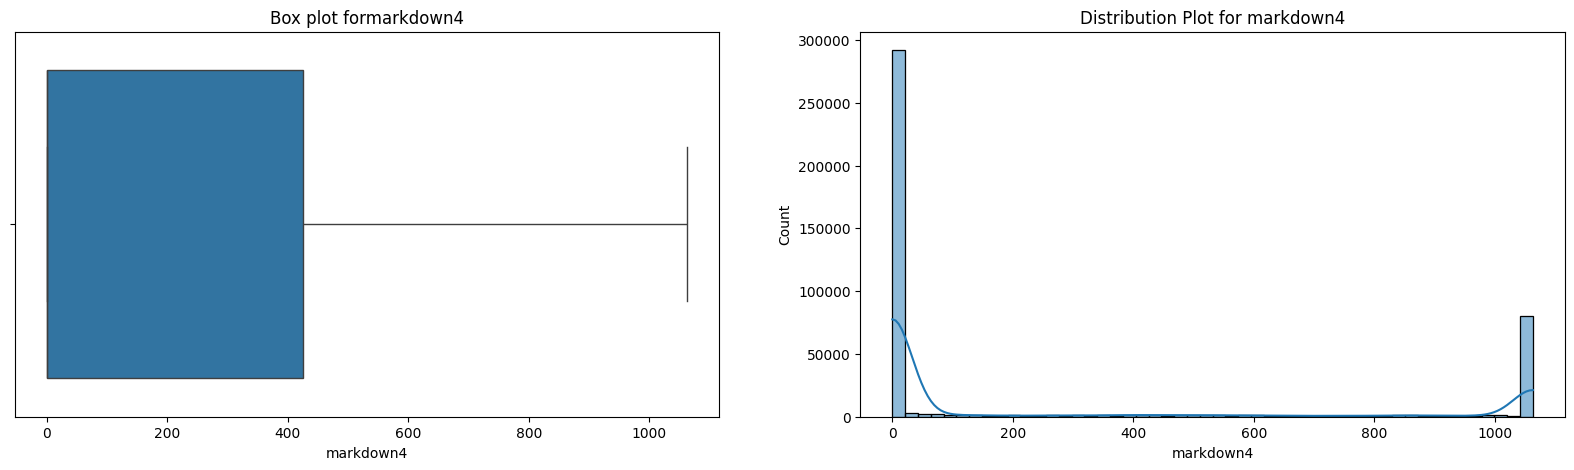

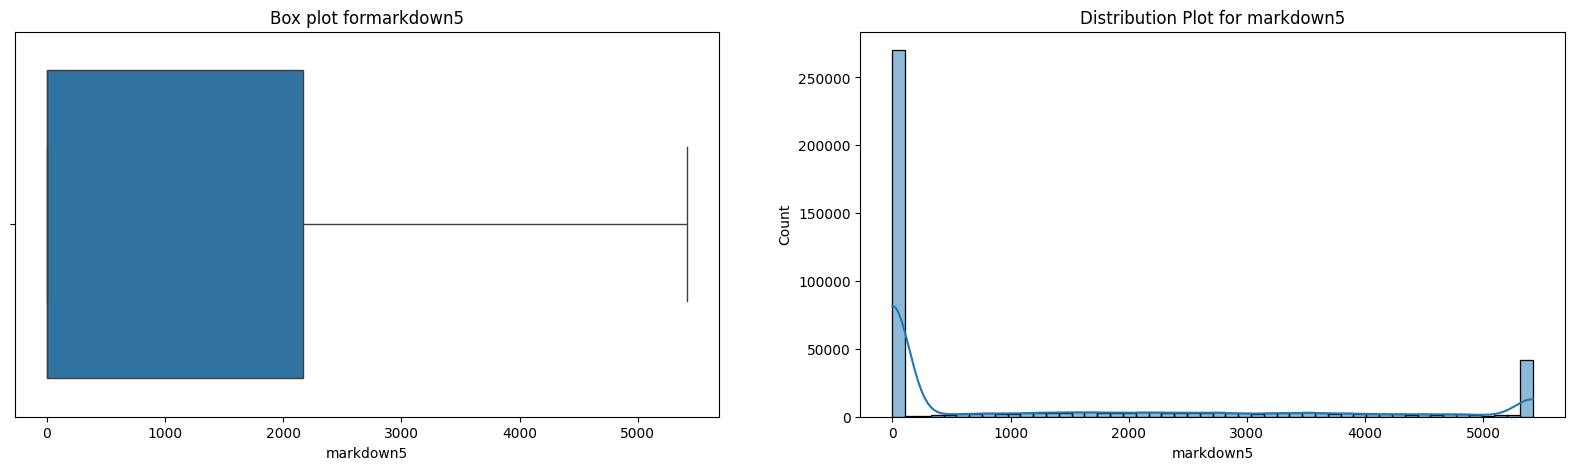

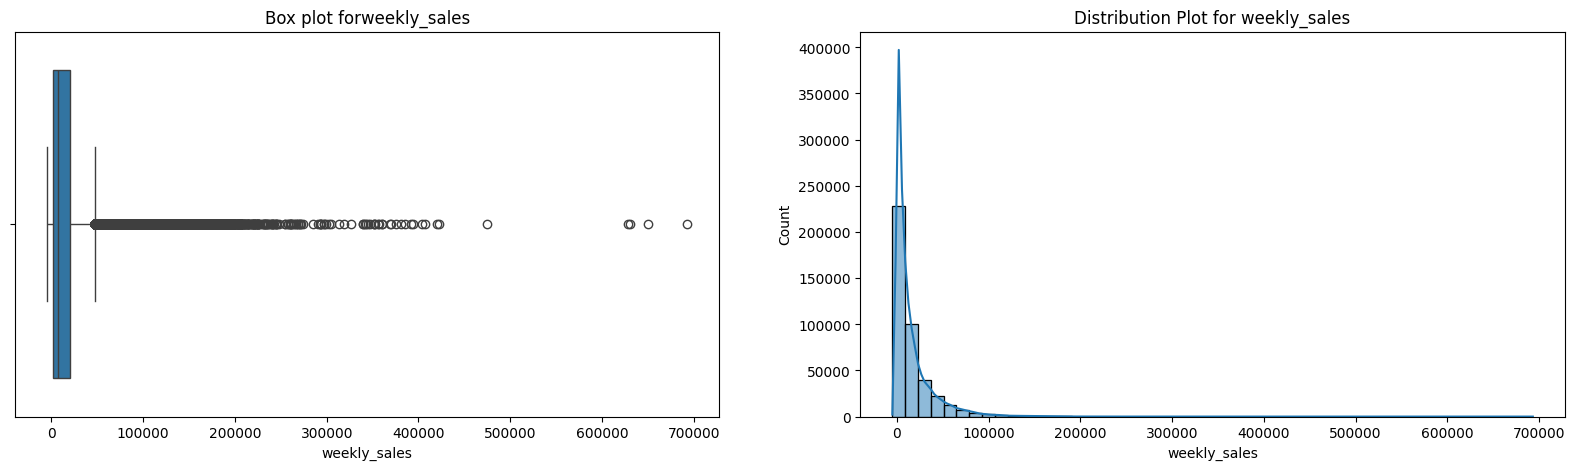

In [95]:
continuous_columns = ['markdown1', 'markdown2','markdown3','markdown4','markdown5',
                      'weekly_sales']
for i in continuous_columns:
    plot(df, i)

In [96]:

df[df['weekly_sales']>450000]

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,month_year,year
90645,10,2010-11-26,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003,True,72,693099.36,B,126512,2010-11,2010
94393,10,2011-11-25,60.68,3.760,174.72,5.5,11.35,79.00,1009.98,129.836400,7.874,True,72,630999.19,B,126512,2011-11,2011
131088,14,2010-11-26,46.15,3.039,0.00,0.0,0.00,0.00,0.00,182.783277,8.724,True,72,474330.10,A,200898,2010-11,2010
333594,35,2010-11-26,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763,True,72,627962.93,B,103681,2010-11,2010
337053,35,2011-11-25,47.88,3.492,1333.24,0.0,11.35,20.97,5420.10,140.421786,8.745,True,72,649770.18,B,103681,2011-11,2011


NLP-NATURAL LANGUAGE PROCESSING

In [97]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                    object
size                     int64
month_year           period[M]
year                     int32
dtype: object

In [98]:
df['type']=df['type'].replace({'A':1,'B':2,'C':3})

C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\496051999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type']=df['type'].replace({'A':1,'B':2,'C':3})


In [99]:
df.dtypes

store                    int64
date            datetime64[ns]
temperature            float64
fuel_price             float64
markdown1              float64
markdown2              float64
markdown3              float64
markdown4              float64
markdown5              float64
cpi                    float64
unemployment           float64
isholiday                 bool
dept                     int64
weekly_sales           float64
type                     int64
size                     int64
month_year           period[M]
year                     int32
dtype: object

In [100]:
df.type.unique()

array([1, 2, 3], dtype=int64)

In [101]:
df.head(2)

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,month_year,year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,1,151315,2010-02,2010
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,1,151315,2010-02,2010


In [102]:
df['year']=df['date'].dt.year


In [103]:
df = df.drop("date",axis=1)
     


In [104]:
df

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,month_year,year
0,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,1,24924.50,1,151315,2010-02,2010
1,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,2,50605.27,1,151315,2010-02,2010
2,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,3,13740.12,1,151315,2010-02,2010
3,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,4,39954.04,1,151315,2010-02,2010
4,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,5,32229.38,1,151315,2010-02,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,93,2487.80,2,118221,2012-10,2012
421566,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,94,5203.31,2,118221,2012-10,2012
421567,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,95,56017.47,2,118221,2012-10,2012
421568,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,97,6817.48,2,118221,2012-10,2012


In [105]:
df.dtypes

store               int64
temperature       float64
fuel_price        float64
markdown1         float64
markdown2         float64
markdown3         float64
markdown4         float64
markdown5         float64
cpi               float64
unemployment      float64
isholiday            bool
dept                int64
weekly_sales      float64
type                int64
size                int64
month_year      period[M]
year                int32
dtype: object

In [106]:
df = df.drop('month_year',axis=1)

In [107]:
df

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,year
0,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,1,24924.50,1,151315,2010
1,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,2,50605.27,1,151315,2010
2,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,3,13740.12,1,151315,2010
3,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,4,39954.04,1,151315,2010
4,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,5,32229.38,1,151315,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,93,2487.80,2,118221,2012
421566,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,94,5203.31,2,118221,2012
421567,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,95,56017.47,2,118221,2012
421568,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,97,6817.48,2,118221,2012


In [108]:
df.to_csv("salesforecastnlp1.csv")

MODEL BUILDING

Separating independent and dependent feature

In [109]:
x=df.drop(["weekly_sales","fuel_price","markdown1","markdown2","markdown3","markdown4","markdown5"],axis=1)
y=df["weekly_sales"]

In [110]:
x.head(2)

,store,temperature,cpi,unemployment,isholiday,dept,type,size,year
0,1,42.31,211.096358,8.106,False,1,1,151315,2010
1,1,42.31,211.096358,8.106,False,2,1,151315,2010


In [111]:
y.head(2)

0    24924.50
1    50605.27
Name: weekly_sales, dtype: float64

Splitting training and testing dataset

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score


In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

In [116]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}


decisiontree Regressor accuracy score:  1.0 0.9023462660396585
RandomForestRegressor accuracy score:  0.9919149918805823 0.9373558562288776
GradientBoostingRegressor accuracy score:  0.7502101321012659 0.7395476428091907
AdaBoostRegressor accuracy score:  0.12685987675383859 0.1252832053263736
Extra Trees Regressor accuracy score:  0.9999999999914898 0.9338889401580739


In [118]:
print(x_train.shape)  # Should print (number of samples, number of features)
print(y_train.shape)  # Should print (number of samples,)


(316177, 9)
(316177,)


In [119]:
df

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday,dept,weekly_sales,type,size,year
0,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,1,24924.50,1,151315,2010
1,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,2,50605.27,1,151315,2010
2,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,3,13740.12,1,151315,2010
3,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,4,39954.04,1,151315,2010
4,1,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,False,5,32229.38,1,151315,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,93,2487.80,2,118221,2012
421566,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,94,5203.31,2,118221,2012
421567,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,95,56017.47,2,118221,2012
421568,45,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,97,6817.48,2,118221,2012



Identified Best Algorithm: Random Forest Regressor

In [120]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {'DecisionTree': model.RandomForestRegressor()}
     

RandomForestRegressor accuracy score:  0.991861611714033 0.9363876210252778



Train the Model with Parameters

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
import numpy as np

# Define a reduced parameter grid
param_grid = {
    'rfr__n_estimators': [50, 100],
    'rfr__max_depth': [10, 15],
    'rfr__min_samples_split': [2, 3],
    'rfr__min_samples_leaf': [1, 2],
    'rfr__bootstrap': [True]
}

# Initialize the model
rf = RandomForestRegressor()

# Create a pipeline for feature selection and model training
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k=10)),  # Select top 10 features
    ('rfr', rf)
])

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


KeyboardInterrupt: 

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
x=df.drop(["weekly_sales","fuel_price","markdown1","markdown2","markdown3","markdown4","markdown5"],axis=1)
y=df["weekly_sales"]
# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


KeyboardInterrupt: 

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Example dataset (replace with your own data)
x=df.drop(["weekly_sales","fuel_price","markdown1","markdown2","markdown3","markdown4","markdown5"],axis=1)
y=df["weekly_sales"]
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Initialize the model
rf = RandomForestRegressor()

# Set up GridSearchCV with fewer CV folds and a subset of data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Use a smaller subset for the initial hyperparameter tuning
x_train_small = np.random(x_train) # Using first 500 samples, adjust as needed
y_train_small = np.random(y_train)

# Fit the GridSearchCV to the subset of data
grid_search.fit(x_train_small, y_train_small)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


TypeError: 'module' object is not callable

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
x=df.drop(["weekly_sales","fuel_price","markdown1","markdown2","markdown3","markdown4","markdown5"],axis=1)
y=df["weekly_sales"]
# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the model
rf = RandomForestRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Use a smaller subset for the initial hyperparameter tuning
subset_size = 500  # Adjust as needed, e.g., 500 samples
x_train_small = x_train[:subset_size]
y_train_small = y_train[:subset_size]

# Fit the GridSearchCV to the subset of data
grid_search.fit(x_train_small, y_train_small)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation R² score: 0.5472233862353213



Save the trained model using joblib.

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# Define the parameters
params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 42
}

# Initialize the model with parameters
rf = RandomForestRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the test data
y_pred = rf.predict(x_test)

# Evaluate the model
test_score = r2_score(y_test, y_pred)
print("Test set R² score:", test_score)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Test set R² score: 0.8630234165291958
Mean Absolute Error: 4174.264854472823



Save the trained model using joblib.

In [134]:
import pickle
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [136]:
# Save the model to a file
joblib.dump(rf, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']


Load the saved model when needed.

In [137]:


# Load the model from the file
rf_loaded = joblib.load('random_forest_regressor.pkl')


Create a simple function to make predictions using the loaded model.


In [138]:
x.head(2)

,store,temperature,cpi,unemployment,isholiday,dept,type,size,year
0,1,42.31,211.096358,8.106,False,1,1,151315,2010
1,1,42.31,211.096358,8.106,False,2,1,151315,2010


In [139]:
y.head(2)

0    24924.50
1    50605.27
Name: weekly_sales, dtype: float64

In [141]:
import numpy as np
y_pred = rf_loaded.predict(np.array([[1,42.31,	211.096358,	8.106,	False,	2,	1,	151315,	2010]]))
y_pred[0]
     

c:\Users\Prajee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


41501.20710551383

In [140]:
print(f"The model expects {rf_loaded.n_features_in_} features.")


The model expects 9 features.



Task 2: Model the effects of markdowns on holiday weeks

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [142]:
merge_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [179]:
sales_path=r"C:\Users\Prajee\Downloads\sales_data_set.csv"

features_path=r"C:\Users\Prajee\Downloads\Features_data_set.csv"
sales_df=pd.read_csv(sales_path)

features_df=pd.read_csv(features_path)

In [180]:
features_df.shape

(8190, 12)

In [181]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [192]:
data.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday', 'dept', 'weekly_sales', 'type', 'size', 'Store', 'Dept',
       'Date', 'Weekly_Sales', 'IsHoliday'],
      dtype='object')

In [214]:
merged_df = pd.concat([data, sales_df], axis=1)


In [194]:
# Check for rows where all markdown values are zero
zero_markdown_rows = data[(data['markdown1'] == 0) & (data['markdown2'] == 0) & (data['markdown3'] == 0) & (data['markdown4'] == 0) & (data['markdown5'] == 0)]

# Drop rows where all markdown values are zero
data = data.drop(zero_markdown_rows.index)

# Reset index after dropping rows
data = data.reset_index(drop=True)

# Check the updated dataset
data

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,...,isholiday,dept,weekly_sales,type,size,Store,Dept,Date,Weekly_Sales,IsHoliday
0,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,1.0,7541.74,C,42988.0,1,1,05/02/2010,24924.50,False
1,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,2.0,12436.94,C,42988.0,1,1,12/02/2010,46039.49,True
2,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,3.0,483.87,C,42988.0,1,1,19/02/2010,41595.55,False
3,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,4.0,12144.74,C,42988.0,1,1,26/02/2010,19403.54,False
4,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,5.0,327.52,C,42988.0,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45,98,28/09/2012,508.37,False
421566,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45,98,05/10/2012,628.10,False
421567,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45,98,12/10/2012,1061.02,False
421568,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45,98,19/10/2012,760.01,False


In [220]:
merge_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [159]:
data = merged_df.copy()

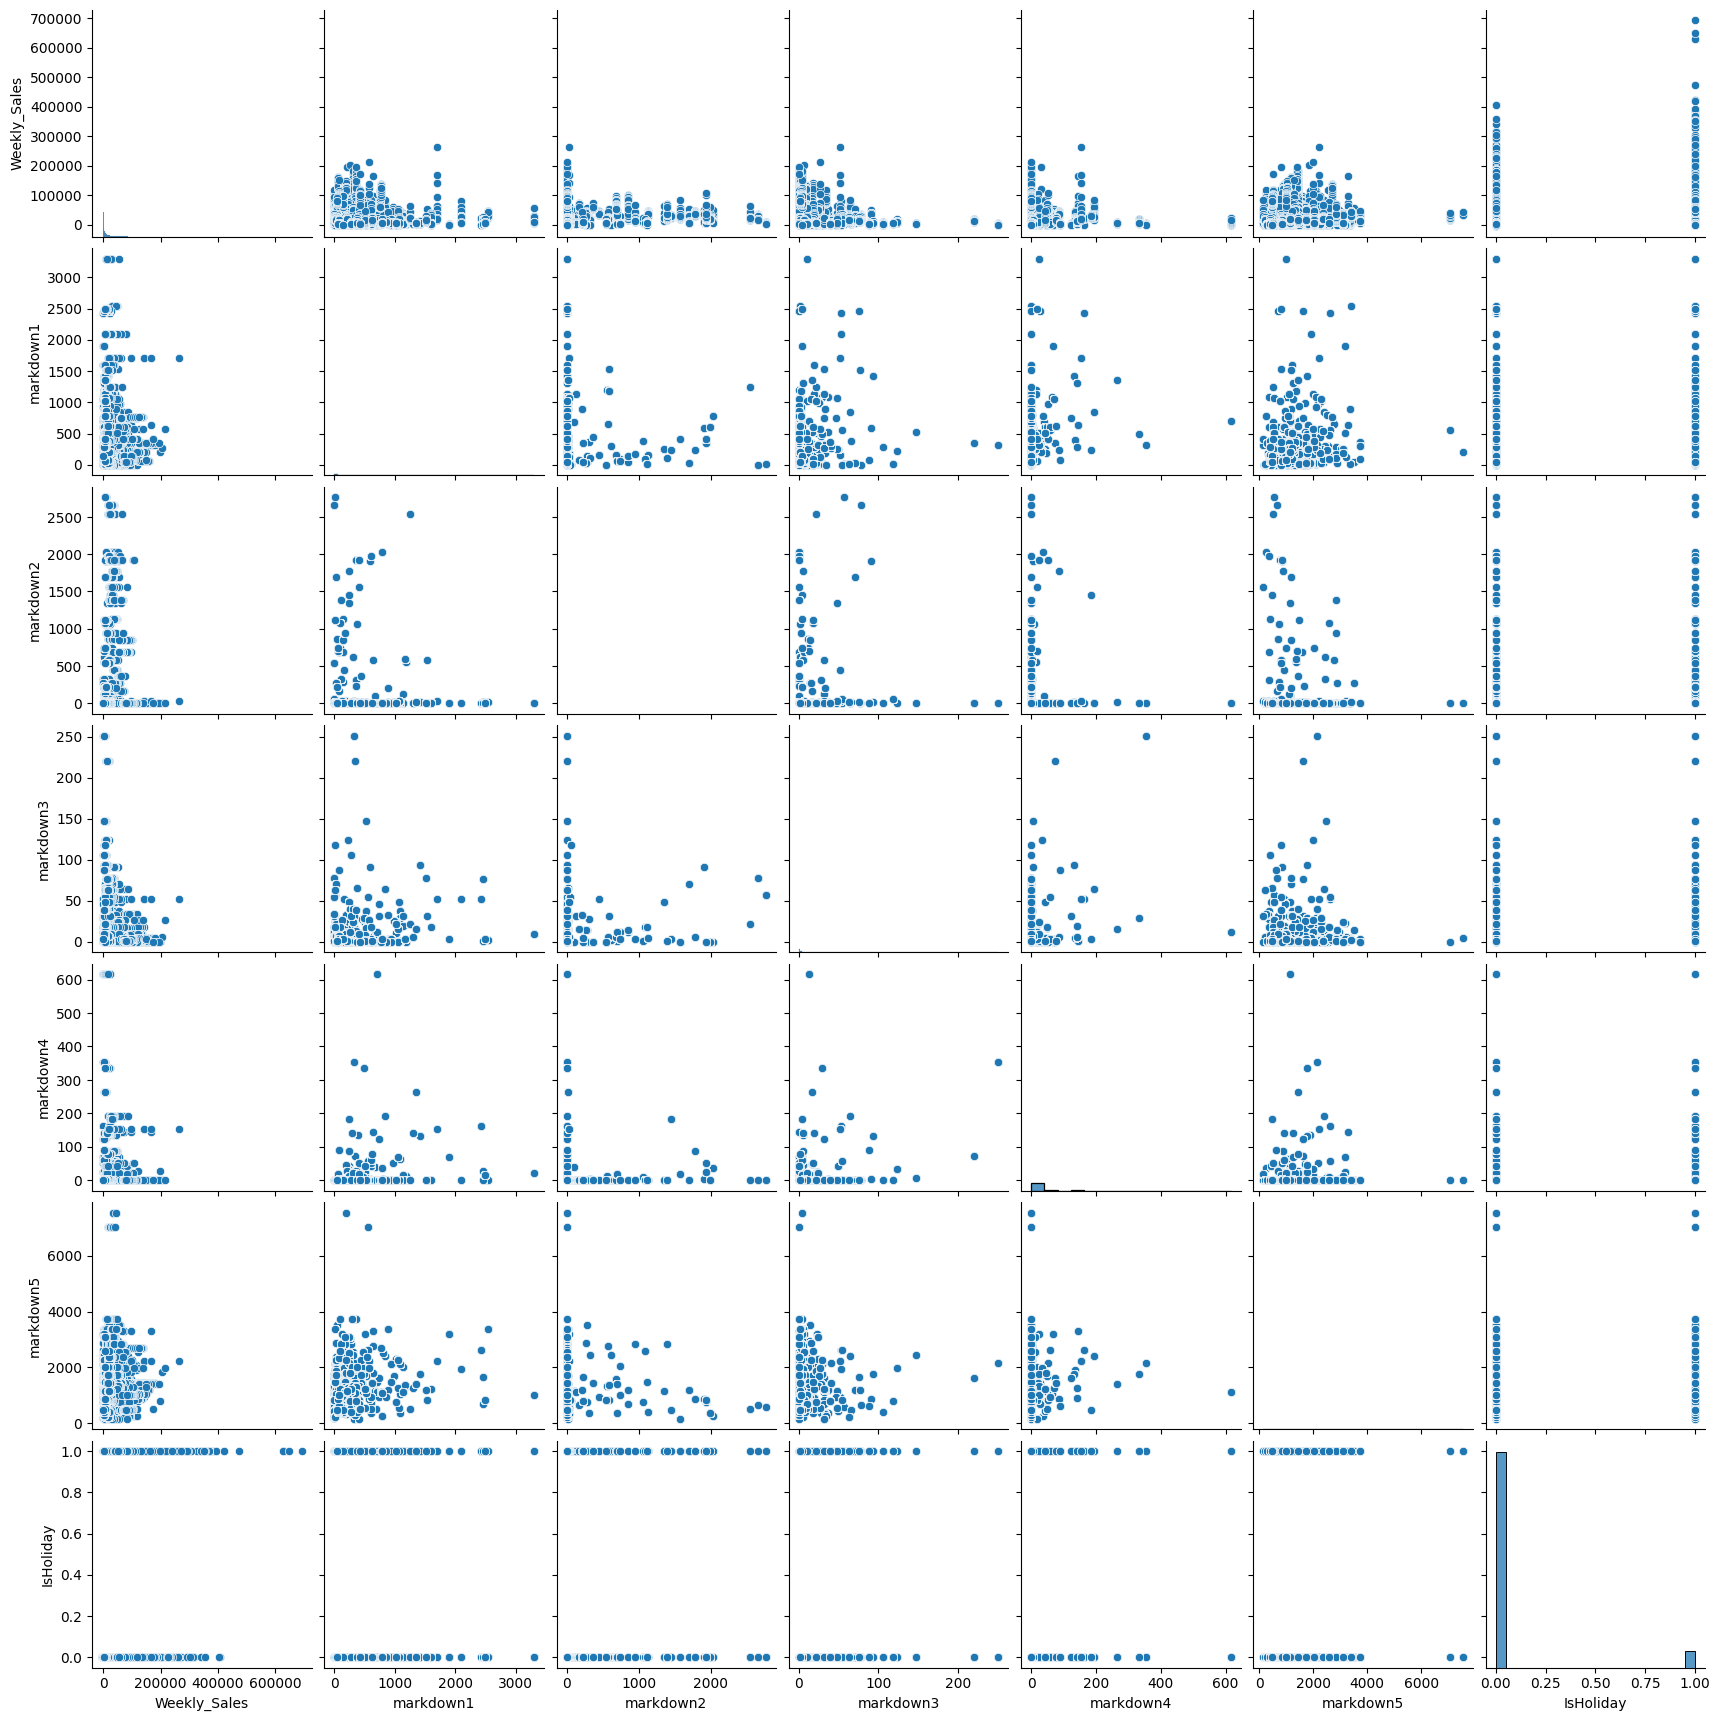

In [160]:


# EDA
sns.pairplot(data[['Weekly_Sales', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'IsHoliday']])
plt.show()
     

In [ ]:
data.columns

In [197]:
data.head()

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,...,isholiday,dept,weekly_sales,type,size,Store,Dept,Date,Weekly_Sales,IsHoliday
0,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,1.0,7541.74,C,42988.0,1,1,05/02/2010,24924.50,0
1,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,2.0,12436.94,C,42988.0,1,1,12/02/2010,46039.49,1
2,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,3.0,483.87,C,42988.0,1,1,19/02/2010,41595.55,0
3,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,4.0,12144.74,C,42988.0,1,1,26/02/2010,19403.54,0
4,30.0,2011-11-11,59.8,3.297,42.28,276.94,14.54,0.0,3508.88,217.645539,...,False,5.0,327.52,C,42988.0,1,1,05/03/2010,21827.90,0


In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



# Feature engineering
data['IsHoliday'] = data['IsHoliday'].astype(int)  # Convert 'IsHoliday' to binary indicator

# Ensure there are no NaN values in the dataset
data = data.dropna()

# Model building
try:
    x = data[["temperature", "fuel_price", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5", "cpi", "unemployment","IsHoliday"]]
    y = data["weekly_sales"]
except KeyError as err:
    print(f"KeyError: {err}")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Interpretation and recommendations
# Analyze coefficients to understand the impact of markdowns on holiday weeks
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Absolute Error: 11311.016126914745
        Feature  Coefficient
0   temperature    21.885490
1    fuel_price   854.565342
2     markdown1    -0.002673
3     markdown2     0.588895
4     markdown3     5.882946
5     markdown4    -2.898220
6     markdown5    -0.310211
7           cpi    27.218185
8  unemployment   276.849372
9     IsHoliday   176.234482


C:\Users\Prajee\AppData\Local\Temp\ipykernel_15376\3549664179.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype(int)  # Convert 'IsHoliday' to binary indicator
